In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import statistics
import math
import time
import numpy as np
from tqdm import tqdm
from scipy import signal
from scipy.stats import pearsonr
from scipy.integrate import simps

In [46]:
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

In [47]:
def convert_to_csv(file):
    input_file_path = file + ".txt"
    df = pd.read_csv(input_file_path, sep=',', names=["Sample Index", "EXG Channel 0", "EXG Channel 1",
                                    "EXG Channel 2", "EXG Channel 3", "EXG Channel 4",
                                   "EXG Channel 5", "EXG Channel 6", "EXG Channel 7",
                                   "Accel Channel 0", "Accel Channel 1", "Accel Channel 2",
                                   "Other 0", "Other 1", "Other 2", "Other 3", "Other 4", "Other 5",
                                   "Other 6", "Analog Channel 0", "Analog Channel 1",
                                    "Analog Channel 2", "Timestamp", "Other",
                                    "Timestamp (formatted)"], skiprows=6)
    output_file_path = file + ".csv"
    df.to_csv(output_file_path, index=False)

In [48]:
def list_channels(recording_df):
    
    ch0 = recording_df.iloc[:, 1:2].values.tolist()
    ch1 = recording_df.iloc[:, 2:3].values.tolist()
    ch2 = recording_df.iloc[:, 3:4].values.tolist()
    ch3 = recording_df.iloc[:, 4:5].values.tolist()
    ch4 = recording_df.iloc[:, 5:6].values.tolist()
    ch5 = recording_df.iloc[:, 6:7].values.tolist()
    ch6 = recording_df.iloc[:, 7:8].values.tolist()
    ch7 = recording_df.iloc[:, 8:9].values.tolist()
    
    return(ch0, ch1, ch2, ch3, ch4, ch5, ch6, ch7)

In [49]:
#takes as input the csv files for the timestamp markers and returns
#a list for each series of timestamps

def list_timestamps(left_ts, right_ts):
    
    ts_left_df = pd.read_csv(left_ts)
    ts_right_df = pd.read_csv(right_ts)
    
    left_start = ts_left_df.iloc[:, 0:1].values.tolist()
    left_end = ts_left_df.iloc[:, 1:2].values.tolist()
    right_start = ts_right_df.iloc[:, 0:1].values.tolist()
    right_end = ts_right_df.iloc[:, 1:2].values.tolist()
    
    left_start_list  = []
    left_end_list    = []
    right_start_list = []
    right_end_list   = []
    
    for i in range(len(left_start)):
        left_start_list.append(left_start[i][0])
    
    for i in range(len(left_end)):
        left_end_list.append(left_end[i][0])
    
    for i in range(len(right_start)):
        right_start_list.append(right_start[i][0])
    
    for i in range(len(right_end)):
        right_end_list.append(right_end[i][0])
        
    return(left_start_list, left_end_list, right_start_list, right_end_list)

In [50]:
def match_stim_markers(recording_df, left_start_list, left_end_list, 
                       right_start_list, right_end_list):
    
    recording_ts_df = recording_df.iloc[:, 22:23].values.tolist()
    recording_ts_list = []

    for i in range(len(recording_ts_df)):
        recording_ts_list.append(recording_ts_df[i][0])
    
    left_start_index  = []
    left_end_index    = []
    right_start_index = []
    right_end_index   = []
    
    for i in left_start_list:
        for j in range(len(recording_ts_list)):
            if math.isclose(i, recording_ts_list[j], abs_tol = .004):
                left_start_index.append(j)
                break
                
    for i in left_end_list:
        for j in range(len(recording_ts_list)):
            if math.isclose(i, recording_ts_list[j], abs_tol = .004):
                left_end_index.append(j)
                break
            
    for i in right_start_list:
        for j in range(len(recording_ts_list)):
            if math.isclose(i, recording_ts_list[j], abs_tol = .004):
                right_start_index.append(j)
                break
            
    for i in right_end_list:
        for j in range(len(recording_ts_list)):
            if math.isclose(i, recording_ts_list[j], abs_tol = .004):
                right_end_index.append(j)
                break
                
    return(left_start_index, left_end_index, right_start_index, right_end_index)

In [51]:
#data for imagined movements
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

data_txt1 = "TT_Imagined_Trial4/OpenBCI-RAW-2023-11-30_18-34-11"
data1 = "TT_Imagined_Trial4/OpenBCI-RAW-2023-11-30_18-34-11.csv"
data1_left_ts = "TT_Imagined_Trial4/TT_left_time_trial4_imagined.csv"
data1_right_ts = "TT_Imagined_Trial4/TT_right_time_trial4_imagined.csv"
data1_rest_ts = "TT_rest_time_trial4_Imagined.csv"

#converts raw OpenBCI text file to csv
convert_to_csv(data_txt1)

#reads OpenBCI csv into df
d1_df = pd.read_csv(data1)

#takes stimuli markers and converts them to list for matching markers in the OpenBCI df
d1_LS_l, d1_LE_l, d1_RS_l, d1_RE_l = list_timestamps(data1_left_ts, data1_right_ts)

#matches stimuli marker list and returns indexes of their occurence in df (use to model)
d1_LS_i, d1_LE_i, d1_RS_i, d1_RE_i = match_stim_markers(d1_df, d1_LS_l, d1_LE_l, d1_RS_l, d1_RE_l)

#create list for each channel recording (1-8)
d1_ch0, d1_ch1, d1_ch2, d1_ch3, d1_ch4, d1_ch5, d1_ch6, d1_ch7 = list_channels(d1_df)

d1_channels = [d1_ch0, d1_ch1, d1_ch2, d1_ch3,
               d1_ch4, d1_ch5, d1_ch6, d1_ch7]


In [52]:
#Data for actual movements
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

data_txt2 = "TT_Actual_Trial3/OpenBCI-RAW-2023-11-30_18-17-24"
data2 = "TT_Actual_Trial3/OpenBCI-RAW-2023-11-30_18-17-24.csv"
data2_left_ts = "TT_Actual_Trial3/TT_left_time_trial3_actual.csv"
data2_right_ts = "TT_Actual_Trial3/TT_right_time_trial3_actual.csv"
data2_rest_ts = "TT_rest_time_trial3_actual.csv"

#converts raw OpenBCI text file to csv
convert_to_csv(data_txt2)

#reads OpenBCI csv into df
d2_df = pd.read_csv(data2)

#takes stimuli markers and converts them to list for matching markers in the OpenBCI df
d2_LS_l, d2_LE_l, d2_RS_l, d2_RE_l = list_timestamps(data2_left_ts, data2_right_ts)

#matches stimuli marker list and returns indexes of their occurence in df (use to model)
d2_LS_i, d2_LE_i, d2_RS_i, d2_RE_i = match_stim_markers(d2_df, d2_LS_l, d2_LE_l, d2_RS_l, d2_RE_l)

#create list for each channel recording (1-8)
d2_ch0, d2_ch1, d2_ch2, d2_ch3, d2_ch4, d2_ch5, d2_ch6, d2_ch7 = list_channels(d2_df)

d2_channels = [d2_ch0, d2_ch1, d2_ch2, d2_ch3,
               d2_ch4, d2_ch5, d2_ch6, d2_ch7]


In [227]:
d1_channels[2]

[[30338.26861837729],
 [30328.746775239324],
 [30329.842010717635],
 [30342.917781223987],
 [30346.136432425552],
 [30325.99751067132],
 [30317.92853092296],
 [30343.23070564636],
 [30349.288028393752],
 [30334.893504964533],
 [30323.06943214768],
 [30341.57667655667],
 [30347.09755743713],
 [30341.53197306776],
 [30327.91976069448],
 [30346.650522548025],
 [30349.511545838304],
 [30349.15391792702],
 [30336.39107184304],
 [30343.36481611309],
 [30352.014941217298],
 [30352.12669993957],
 [30338.693301521937],
 [30343.744795768835],
 [30352.976066228875],
 [30346.874039992577],
 [30335.29583636473],
 [30333.0606619192],
 [30346.91874348149],
 [30350.338560383152],
 [30341.33080736766],
 [30337.66512127699],
 [30349.489194093847],
 [30346.67287429248],
 [30346.739929525847],
 [30335.63111253156],
 [30344.43769984695],
 [30348.37160687108],
 [30342.40369110152],
 [30323.583522270143],
 [30327.07039440517],
 [30334.848801475626],
 [30333.731214252857],
 [30320.61074025759],
 [30331.652502

In [53]:
min(d1_RS_i)

11949

Text(0.5, 1.0, 'Raw Sample Data (Imagined Movements w/ DC Offset)')

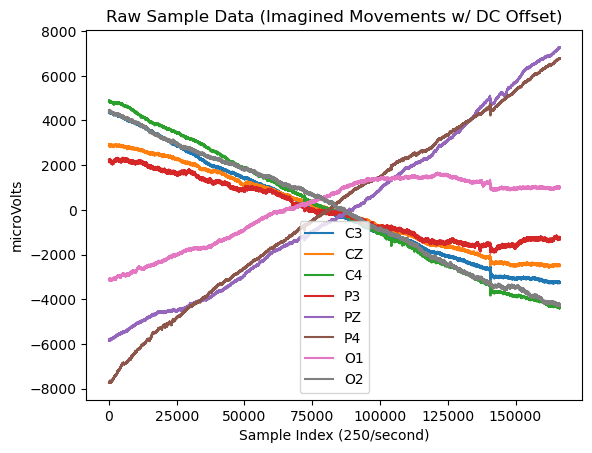

In [54]:
plt.plot(d1_channels[0][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[0][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[1][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[1][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[2][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[2][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[3][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[3][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[4][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[4][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[5][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[5][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[6][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[6][d1_RS_i[0]:max(d1_RE_i)]))
plt.plot(d1_channels[7][d1_RS_i[0]:max(d1_RE_i)]-np.mean(d1_channels[7][d1_RS_i[0]:max(d1_RE_i)]))

plt.legend(channel_labels)

plt.xlabel('Sample Index (250/second)')
plt.ylabel('Raw Data')
plt.ylabel('microVolts')
plt.title('Raw Sample Data (Imagined Movements w/ DC Offset)')

Text(0.5, 1.0, 'Raw Sample Data (Actual Movements w/ DC Offset)')

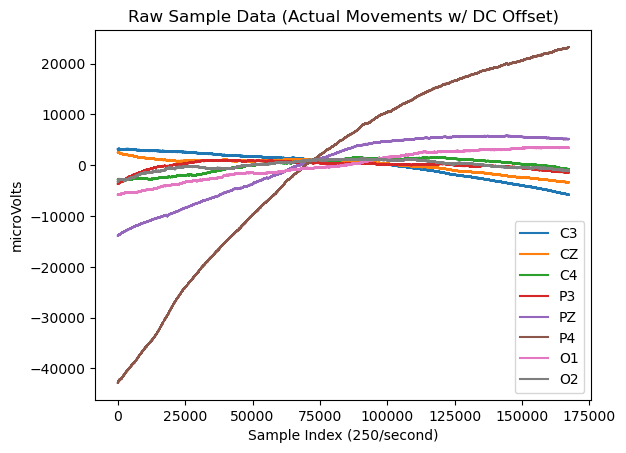

In [55]:
plt.plot(d2_channels[0][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[0][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[1][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[1][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[2][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[2][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[3][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[3][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[4][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[4][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[5][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[5][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[6][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[6][d2_RS_i[0]:max(d2_LE_i)]))
plt.plot(d2_channels[7][d2_RS_i[0]:max(d2_LE_i)]-np.mean(d2_channels[7][d2_RS_i[0]:max(d2_LE_i)]))

plt.legend(channel_labels)

plt.xlabel('Sample Index (250/second)')
plt.ylabel('Raw Data')
plt.ylabel('microVolts')
plt.title('Raw Sample Data (Actual Movements w/ DC Offset)')

In [337]:
976.6/(998.8+1700.6+805.4+3626.0+562.8+976.6)
19.7/(19.2+33.3+16.4+39.4+13+19.7)
23.1/(120.8+57.8+26.2+41.6+14.9+23.1)

0.08122362869198313

In [274]:
#average relative power level for electrode readings on left hand tasks in imagined tasks
o1_total_power = 0
o2_total_power = 0
p3_total_power = 0
p4_total_power = 0
c3_total_power = 0
c4_total_power = 0

for left_trial in range(len(d1_LS_i)):

    d1_o1_L_psd = [item[0] for item in d1_channels[6][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
    d1_p3_L_psd = [item[0] for item in d1_channels[3][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
    d1_c3_L_psd = [item[0] for item in d1_channels[0][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]

    d1_o2_L_psd = [item[0] for item in d1_channels[7][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
    d1_p4_L_psd = [item[0] for item in d1_channels[5][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
    d1_c4_L_psd = [item[0] for item in d1_channels[2][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]

    d1_o1_L_psd_df = pd.DataFrame([d1_o1_L_psd])
    d1_p3_L_psd_df = pd.DataFrame([d1_p3_L_psd])
    d1_c3_L_psd_df = pd.DataFrame([d1_c3_L_psd])
    d1_o2_L_psd_df = pd.DataFrame([d1_o2_L_psd])
    d1_p4_L_psd_df = pd.DataFrame([d1_p4_L_psd])
    d1_c4_L_psd_df = pd.DataFrame([d1_c4_L_psd])
    
    fs = 250
    t_duration = 3
    epoch_len = t_duration * fs
    time = np.arange(epoch_len)/fs

    wws = 2
    psdw_width = int(wws*fs/2)+1
    i_psdw1 = np.empty(shape=(4,psdw_width))
    i_psdw2 = np.empty(shape=(4,psdw_width))
    i_psdw3 = np.empty(shape=(4,psdw_width))
    i_psdw4 = np.empty(shape=(4,psdw_width))
    i_psdw5 = np.empty(shape=(4,psdw_width))
    i_psdw6 = np.empty(shape=(4,psdw_width))
    
    d1_o1_L_fw, i_psdw1[0] = signal.welch(d1_o1_L_psd_df, fs, nperseg=wws*fs, average='median')
    d1_p3_L_fw, i_psdw2[0] = signal.welch(d1_p3_L_psd_df, fs, nperseg=wws*fs, average='median')
    d1_c3_L_fw, i_psdw3[0] = signal.welch(d1_c3_L_psd_df, fs, nperseg=wws*fs, average='median')

    d1_o2_L_fw, i_psdw4[0] = signal.welch(d1_o2_L_psd_df, fs, nperseg=wws*fs, average='median')
    d1_p4_L_fw, i_psdw5[0] = signal.welch(d1_p4_L_psd_df, fs, nperseg=wws*fs, average='median')
    d1_c4_L_fw, i_psdw6[0] = signal.welch(d1_c4_L_psd_df, fs, nperseg=wws*fs, average='median')
    
    d1_i_o1_L_power = simps(i_psdw1[0][14:30])
    d1_i_p3_L_power = simps(i_psdw2[0][14:30])
    d1_i_c3_L_power = simps(i_psdw3[0][14:30])
    d1_i_o2_L_power = simps(i_psdw4[0][14:30])
    d1_i_p4_L_power = simps(i_psdw5[0][14:30])
    d1_i_c4_L_power = simps(i_psdw6[0][14:30])
    
    o1_total_power += d1_i_o1_L_power
    o2_total_power += d1_i_o2_L_power
    p3_total_power += d1_i_p3_L_power
    p4_total_power += d1_i_p4_L_power
    c3_total_power += d1_i_c3_L_power
    c4_total_power += d1_i_c4_L_power
    
o1_average = o1_total_power/len(d1_LS_i)
o2_average = o2_total_power/len(d1_LS_i)
p3_average = p3_total_power/len(d1_LS_i)
p4_average = p4_total_power/len(d1_LS_i)
c3_average = c3_total_power/len(d1_LS_i)
c4_average = c4_total_power/len(d1_LS_i)

    
    

In [249]:
print("Average Power level (left hand task) imagined")
print('O1: %.1f power' % o1_average)
print('O2: %.1f power' % o2_average)
print('P3: %.1f power' % p3_average)
print('P4: %.1f power' % p4_average)
print('C3: %.1f power' % c3_average)
print('C4: %.1f power' % c4_average)

Average Power level (left hand task) imagined
O1: 72.0 power
O2: 47.7 power
P3: 33.6 power
P4: 33.5 power
C3: 25.0 power
C4: 32.2 power


In [252]:
#right hand average imagined
o1_total_power = 0
o2_total_power = 0
p3_total_power = 0
p4_total_power = 0
c3_total_power = 0
c4_total_power = 0

for right_trial in range(len(d1_RS_i)):

    d1_o1_R_psd = [item[0] for item in d1_channels[6][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
    d1_p3_R_psd = [item[0] for item in d1_channels[3][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
    d1_c3_R_psd = [item[0] for item in d1_channels[0][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]

    d1_o2_R_psd = [item[0] for item in d1_channels[7][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
    d1_p4_R_psd = [item[0] for item in d1_channels[5][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
    d1_c4_R_psd = [item[0] for item in d1_channels[2][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]

    d1_o1_R_psd_df = pd.DataFrame([d1_o1_R_psd])
    d1_p3_R_psd_df = pd.DataFrame([d1_p3_R_psd])
    d1_c3_R_psd_df = pd.DataFrame([d1_c3_R_psd])
    d1_o2_R_psd_df = pd.DataFrame([d1_o2_R_psd])
    d1_p4_R_psd_df = pd.DataFrame([d1_p4_R_psd])
    d1_c4_R_psd_df = pd.DataFrame([d1_c4_R_psd])
    
    fs = 250
    t_duration = 3
    epoch_len = t_duration * fs
    time = np.arange(epoch_len)/fs

    wws = 2
    psdw_width = int(wws*fs/2)+1
    i_psdw1 = np.empty(shape=(4,psdw_width))
    i_psdw2 = np.empty(shape=(4,psdw_width))
    i_psdw3 = np.empty(shape=(4,psdw_width))
    i_psdw4 = np.empty(shape=(4,psdw_width))
    i_psdw5 = np.empty(shape=(4,psdw_width))
    i_psdw6 = np.empty(shape=(4,psdw_width))
    
    d1_o1_R_fw, i_psdw1[0] = signal.welch(d1_o1_R_psd_df, fs, nperseg=wws*fs, average='median')
    d1_p3_R_fw, i_psdw2[0] = signal.welch(d1_p3_R_psd_df, fs, nperseg=wws*fs, average='median')
    d1_c3_R_fw, i_psdw3[0] = signal.welch(d1_c3_R_psd_df, fs, nperseg=wws*fs, average='median')

    d1_o2_R_fw, i_psdw4[0] = signal.welch(d1_o2_R_psd_df, fs, nperseg=wws*fs, average='median')
    d1_p4_R_fw, i_psdw5[0] = signal.welch(d1_p4_R_psd_df, fs, nperseg=wws*fs, average='median')
    d1_c4_R_fw, i_psdw6[0] = signal.welch(d1_c4_R_psd_df, fs, nperseg=wws*fs, average='median')
    
    d1_i_o1_R_power = simps(i_psdw1[0][14:30])
    d1_i_p3_R_power = simps(i_psdw2[0][14:30])
    d1_i_c3_R_power = simps(i_psdw3[0][14:30])
    d1_i_o2_R_power = simps(i_psdw4[0][14:30])
    d1_i_p4_R_power = simps(i_psdw5[0][14:30])
    d1_i_c4_R_power = simps(i_psdw6[0][14:30])
    
    o1_total_power += d1_i_o1_R_power
    o2_total_power += d1_i_o2_R_power
    p3_total_power += d1_i_p3_R_power
    p4_total_power += d1_i_p4_R_power
    c3_total_power += d1_i_c3_R_power
    c4_total_power += d1_i_c4_R_power
    
o1_average = o1_total_power/len(d1_RS_i)
o2_average = o2_total_power/len(d1_RS_i)
p3_average = p3_total_power/len(d1_RS_i)
p4_average = p4_total_power/len(d1_RS_i)
c3_average = c3_total_power/len(d1_RS_i)
c4_average = c4_total_power/len(d1_RS_i)


In [253]:
print("Average Power level (right hand task) imagined")
print('O1: %.1f power' % o1_average)
print('O2: %.1f power' % o2_average)
print('P3: %.1f power' % p3_average)
print('P4: %.1f power' % p4_average)
print('C3: %.1f power' % c3_average)
print('C4: %.1f power' % c4_average)

Average Power level (right hand task) imagined
O1: 79.4 power
O2: 48.6 power
P3: 33.2 power
P4: 32.6 power
C3: 15.0 power
C4: 18.7 power


In [256]:
#average relative power level for electrode readings on left hand tasks in actual tasks
o1_total_power = 0
o2_total_power = 0
p3_total_power = 0
p4_total_power = 0
c3_total_power = 0
c4_total_power = 0

for left_trial in range(len(d2_LS_i)):

    d2_o1_L_psd = [item[0] for item in d2_channels[6][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
    d2_p3_L_psd = [item[0] for item in d2_channels[3][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
    d2_c3_L_psd = [item[0] for item in d2_channels[0][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]

    d2_o2_L_psd = [item[0] for item in d2_channels[7][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
    d2_p4_L_psd = [item[0] for item in d2_channels[5][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
    d2_c4_L_psd = [item[0] for item in d2_channels[2][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]

    d2_o1_L_psd_df = pd.DataFrame([d2_o1_L_psd])
    d2_p3_L_psd_df = pd.DataFrame([d2_p3_L_psd])
    d2_c3_L_psd_df = pd.DataFrame([d2_c3_L_psd])
    d2_o2_L_psd_df = pd.DataFrame([d2_o2_L_psd])
    d2_p4_L_psd_df = pd.DataFrame([d2_p4_L_psd])
    d2_c4_L_psd_df = pd.DataFrame([d2_c4_L_psd])
    
    fs = 250
    t_duration = 3
    epoch_len = t_duration * fs
    time = np.arange(epoch_len)/fs

    wws = 2
    psdw_width = int(wws*fs/2)+1
    i_psdw1 = np.empty(shape=(4,psdw_width))
    i_psdw2 = np.empty(shape=(4,psdw_width))
    i_psdw3 = np.empty(shape=(4,psdw_width))
    i_psdw4 = np.empty(shape=(4,psdw_width))
    i_psdw5 = np.empty(shape=(4,psdw_width))
    i_psdw6 = np.empty(shape=(4,psdw_width))
    
    d2_o1_L_fw, i_psdw1[0] = signal.welch(d2_o1_L_psd_df, fs, nperseg=wws*fs, average='median')
    d2_p3_L_fw, i_psdw2[0] = signal.welch(d2_p3_L_psd_df, fs, nperseg=wws*fs, average='median')
    d2_c3_L_fw, i_psdw3[0] = signal.welch(d2_c3_L_psd_df, fs, nperseg=wws*fs, average='median')

    d2_o2_L_fw, i_psdw4[0] = signal.welch(d2_o2_L_psd_df, fs, nperseg=wws*fs, average='median')
    d2_p4_L_fw, i_psdw5[0] = signal.welch(d2_p4_L_psd_df, fs, nperseg=wws*fs, average='median')
    d2_c4_L_fw, i_psdw6[0] = signal.welch(d2_c4_L_psd_df, fs, nperseg=wws*fs, average='median')
    
    d2_i_o1_L_power = simps(i_psdw1[0][14:30])
    d2_i_p3_L_power = simps(i_psdw2[0][14:30])
    d2_i_c3_L_power = simps(i_psdw3[0][14:30])
    d2_i_o2_L_power = simps(i_psdw4[0][14:30])
    d2_i_p4_L_power = simps(i_psdw5[0][14:30])
    d2_i_c4_L_power = simps(i_psdw6[0][14:30])
    
    o1_total_power += d2_i_o1_L_power
    o2_total_power += d2_i_o2_L_power
    p3_total_power += d2_i_p3_L_power
    p4_total_power += d2_i_p4_L_power
    c3_total_power += d2_i_c3_L_power
    c4_total_power += d2_i_c4_L_power
    
o1_average = o1_total_power/len(d2_LS_i)
o2_average = o2_total_power/len(d2_LS_i)
p3_average = p3_total_power/len(d2_LS_i)
p4_average = p4_total_power/len(d2_LS_i)
c3_average = c3_total_power/len(d2_LS_i)
c4_average = c4_total_power/len(d2_LS_i)

In [257]:
print("Average Power level (left hand task) actual")
print('O1: %.1f power' % o1_average)
print('O2: %.1f power' % o2_average)
print('P3: %.1f power' % p3_average)
print('P4: %.1f power' % p4_average)
print('C3: %.1f power' % c3_average)
print('C4: %.1f power' % c4_average)

Average Power level (left hand task) actual
O1: 110.4 power
O2: 50.6 power
P3: 24.9 power
P4: 39.0 power
C3: 13.8 power
C4: 19.3 power


In [260]:
#right hand average actual
o1_total_power = 0
o2_total_power = 0
p3_total_power = 0
p4_total_power = 0
c3_total_power = 0
c4_total_power = 0

for right_trial in range(len(d2_RS_i)):

    d2_o1_R_psd = [item[0] for item in d2_channels[6][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
    d2_p3_R_psd = [item[0] for item in d2_channels[3][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
    d2_c3_R_psd = [item[0] for item in d2_channels[0][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]

    d2_o2_R_psd = [item[0] for item in d2_channels[7][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
    d2_p4_R_psd = [item[0] for item in d2_channels[5][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
    d2_c4_R_psd = [item[0] for item in d2_channels[2][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]

    d2_o1_R_psd_df = pd.DataFrame([d2_o1_R_psd])
    d2_p3_R_psd_df = pd.DataFrame([d2_p3_R_psd])
    d2_c3_R_psd_df = pd.DataFrame([d2_c3_R_psd])
    d2_o2_R_psd_df = pd.DataFrame([d2_o2_R_psd])
    d2_p4_R_psd_df = pd.DataFrame([d2_p4_R_psd])
    d2_c4_R_psd_df = pd.DataFrame([d2_c4_R_psd])
    
    fs = 250
    t_duration = 3
    epoch_len = t_duration * fs
    time = np.arange(epoch_len)/fs

    wws = 2
    psdw_width = int(wws*fs/2)+1
    i_psdw1 = np.empty(shape=(4,psdw_width))
    i_psdw2 = np.empty(shape=(4,psdw_width))
    i_psdw3 = np.empty(shape=(4,psdw_width))
    i_psdw4 = np.empty(shape=(4,psdw_width))
    i_psdw5 = np.empty(shape=(4,psdw_width))
    i_psdw6 = np.empty(shape=(4,psdw_width))
    
    d2_o1_R_fw, i_psdw1[0] = signal.welch(d2_o1_R_psd_df, fs, nperseg=wws*fs, average='median')
    d2_p3_R_fw, i_psdw2[0] = signal.welch(d2_p3_R_psd_df, fs, nperseg=wws*fs, average='median')
    d2_c3_R_fw, i_psdw3[0] = signal.welch(d2_c3_R_psd_df, fs, nperseg=wws*fs, average='median')

    d2_o2_R_fw, i_psdw4[0] = signal.welch(d2_o2_R_psd_df, fs, nperseg=wws*fs, average='median')
    d2_p4_R_fw, i_psdw5[0] = signal.welch(d2_p4_R_psd_df, fs, nperseg=wws*fs, average='median')
    d2_c4_R_fw, i_psdw6[0] = signal.welch(d2_c4_R_psd_df, fs, nperseg=wws*fs, average='median')
    
    d2_i_o1_R_power = simps(i_psdw1[0][14:30])
    d2_i_p3_R_power = simps(i_psdw2[0][14:30])
    d2_i_c3_R_power = simps(i_psdw3[0][14:30])
    d2_i_o2_R_power = simps(i_psdw4[0][14:30])
    d2_i_p4_R_power = simps(i_psdw5[0][14:30])
    d2_i_c4_R_power = simps(i_psdw6[0][14:30])
    
    o1_total_power += d2_i_o1_R_power
    o2_total_power += d2_i_o2_R_power
    p3_total_power += d2_i_p3_R_power
    p4_total_power += d2_i_p4_R_power
    c3_total_power += d2_i_c3_R_power
    c4_total_power += d2_i_c4_R_power
    
o1_average = o1_total_power/len(d2_RS_i)
o2_average = o2_total_power/len(d2_RS_i)
p3_average = p3_total_power/len(d2_RS_i)
p4_average = p4_total_power/len(d2_RS_i)
c3_average = c3_total_power/len(d2_RS_i)
c4_average = c4_total_power/len(d2_RS_i)


In [261]:
print("Average Power level (right hand task) actual")
print('O1: %.1f power' % o1_average)
print('O2: %.1f power' % o2_average)
print('P3: %.1f power' % p3_average)
print('P4: %.1f power' % p4_average)
print('C3: %.1f power' % c3_average)
print('C4: %.1f power' % c4_average)

Average Power level (right hand task) actual
O1: 120.8 power
O2: 57.8 power
P3: 26.2 power
P4: 41.6 power
C3: 14.9 power
C4: 23.1 power


In [197]:
#convert into same format as A4
trial_start = d1_LS_i[trial]
trial_end = trial_start+750

rest_start = d1_LS_i[trial]
rest_end = rest_start+250

#d1 = imagined
#d2 = actual
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

#left brain, left trial, imagined
d1_o1_L_psd = [item[0] for item in d1_channels[6][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
d1_p3_L_psd = [item[0] for item in d1_channels[3][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
d1_c3_L_psd = [item[0] for item in d1_channels[0][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]

#right brain, left trial, imagined
d1_o2_L_psd = [item[0] for item in d1_channels[7][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
d1_p4_L_psd = [item[0] for item in d1_channels[5][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]
d1_c4_L_psd = [item[0] for item in d1_channels[2][d1_LS_i[left_trial]:d1_LE_i[left_trial]]]

#left brain, right trial, imagined
d1_o1_R_psd = [item[0] for item in d1_channels[6][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
d1_p3_R_psd = [item[0] for item in d1_channels[3][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
d1_c3_R_psd = [item[0] for item in d1_channels[0][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]

#right brain, right trial, imagined
d1_o2_R_psd = [item[0] for item in d1_channels[7][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
d1_p4_R_psd = [item[0] for item in d1_channels[5][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
d1_c4_R_psd = [item[0] for item in d1_channels[2][d1_RS_i[right_trial]:d1_RE_i[right_trial]]]
#####

#left brain, left trial, actual
d2_o1_L_psd = [item[0] for item in d2_channels[6][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
d2_p3_L_psd = [item[0] for item in d2_channels[3][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
d2_c3_L_psd = [item[0] for item in d2_channels[0][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]

#right brain, left trial, actual
d2_o2_L_psd = [item[0] for item in d2_channels[7][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
d2_p4_L_psd = [item[0] for item in d2_channels[5][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]
d2_c4_L_psd = [item[0] for item in d2_channels[2][d2_LS_i[left_trial]:d2_LE_i[left_trial]]]

#left brain, right trial, actual
d2_o1_R_psd = [item[0] for item in d2_channels[6][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
d2_p3_R_psd = [item[0] for item in d2_channels[3][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
d2_c3_R_psd = [item[0] for item in d2_channels[0][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]

#right brain, right trial, actual
d2_o2_R_psd = [item[0] for item in d2_channels[7][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
d2_p4_R_psd = [item[0] for item in d2_channels[5][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]
d2_c4_R_psd = [item[0] for item in d2_channels[2][d2_RS_i[right_trial]:d2_RE_i[right_trial]]]

#lst2

d1_o1_L_psd_df = pd.DataFrame([d1_o1_L_psd])
d1_p3_L_psd_df = pd.DataFrame([d1_p3_L_psd])
d1_c3_L_psd_df = pd.DataFrame([d1_c3_L_psd])
d1_o2_L_psd_df = pd.DataFrame([d1_o2_L_psd])
d1_p4_L_psd_df = pd.DataFrame([d1_p4_L_psd])
d1_c4_L_psd_df = pd.DataFrame([d1_c4_L_psd])

d1_o1_R_psd_df = pd.DataFrame([d1_o1_R_psd])
d1_p3_R_psd_df = pd.DataFrame([d1_p3_R_psd])
d1_c3_R_psd_df = pd.DataFrame([d1_c3_R_psd])
d1_o2_R_psd_df = pd.DataFrame([d1_o2_R_psd])
d1_p4_R_psd_df = pd.DataFrame([d1_p4_R_psd])
d1_c4_R_psd_df = pd.DataFrame([d1_c4_R_psd])

d2_o1_L_psd_df = pd.DataFrame([d2_o1_L_psd])
d2_p3_L_psd_df = pd.DataFrame([d2_p3_L_psd])
d2_c3_L_psd_df = pd.DataFrame([d2_c3_L_psd])
d2_o2_L_psd_df = pd.DataFrame([d2_o2_L_psd])
d2_p4_L_psd_df = pd.DataFrame([d2_p4_L_psd])
d2_c4_L_psd_df = pd.DataFrame([d2_c4_L_psd])

d2_o1_R_psd_df = pd.DataFrame([d2_o1_R_psd])
d2_p3_R_psd_df = pd.DataFrame([d2_p3_R_psd])
d2_c3_R_psd_df = pd.DataFrame([d2_c3_R_psd])
d2_o2_R_psd_df = pd.DataFrame([d2_o2_R_psd])
d2_p4_R_psd_df = pd.DataFrame([d2_p4_R_psd])
d2_c4_R_psd_df = pd.DataFrame([d2_c4_R_psd])

In [198]:
fs = 250
t_duration = 3
epoch_len = t_duration * fs
time = np.arange(epoch_len)/fs

wws = 2
psdw_width = int(wws*fs/2)+1
i_psdw1 = np.empty(shape=(4,psdw_width))
i_psdw2 = np.empty(shape=(4,psdw_width))
i_psdw3 = np.empty(shape=(4,psdw_width))
i_psdw4 = np.empty(shape=(4,psdw_width))
i_psdw5 = np.empty(shape=(4,psdw_width))
i_psdw6 = np.empty(shape=(4,psdw_width))
i_psdw7 = np.empty(shape=(4,psdw_width))
i_psdw8 = np.empty(shape=(4,psdw_width))
i_psdw9 = np.empty(shape=(4,psdw_width))
i_psdw10 = np.empty(shape=(4,psdw_width))
i_psdw11 = np.empty(shape=(4,psdw_width))
i_psdw12 = np.empty(shape=(4,psdw_width))

a_psdw1 = np.empty(shape=(4,psdw_width))
a_psdw2 = np.empty(shape=(4,psdw_width))
a_psdw3 = np.empty(shape=(4,psdw_width))
a_psdw4 = np.empty(shape=(4,psdw_width))
a_psdw5 = np.empty(shape=(4,psdw_width))
a_psdw6 = np.empty(shape=(4,psdw_width))
a_psdw7 = np.empty(shape=(4,psdw_width))
a_psdw8 = np.empty(shape=(4,psdw_width))
a_psdw9 = np.empty(shape=(4,psdw_width))
a_psdw10 = np.empty(shape=(4,psdw_width))
a_psdw11 = np.empty(shape=(4,psdw_width))
a_psdw12 = np.empty(shape=(4,psdw_width))

d1_o1_L_fw, i_psdw1[0] = signal.welch(d1_o1_L_psd_df, fs, nperseg=wws*fs, average='median')
d1_p3_L_fw, i_psdw2[0] = signal.welch(d1_p3_L_psd_df, fs, nperseg=wws*fs, average='median')
d1_c3_L_fw, i_psdw3[0] = signal.welch(d1_c3_L_psd_df, fs, nperseg=wws*fs, average='median')

d1_o2_L_fw, i_psdw4[0] = signal.welch(d1_o2_L_psd_df, fs, nperseg=wws*fs, average='median')
d1_p4_L_fw, i_psdw5[0] = signal.welch(d1_p4_L_psd_df, fs, nperseg=wws*fs, average='median')
d1_c4_L_fw, i_psdw6[0] = signal.welch(d1_c4_L_psd_df, fs, nperseg=wws*fs, average='median')

d1_o1_R_fw, i_psdw7[0] = signal.welch(d1_o1_R_psd_df, fs, nperseg=wws*fs, average='median')
d1_p3_R_fw, i_psdw8[0] = signal.welch(d1_p3_R_psd_df, fs, nperseg=wws*fs, average='median')
d1_c3_R_fw, i_psdw9[0] = signal.welch(d1_c3_R_psd_df, fs, nperseg=wws*fs, average='median')

d1_o2_R_fw, i_psdw10[0] = signal.welch(d1_o2_R_psd_df, fs, nperseg=wws*fs, average='median')
d1_p4_R_fw, i_psdw11[0] = signal.welch(d1_p4_R_psd_df, fs, nperseg=wws*fs, average='median')
d1_c4_R_fw, i_psdw12[0] = signal.welch(d1_c4_R_psd_df, fs, nperseg=wws*fs, average='median')

d2_o1_L_fw, a_psdw1[0] = signal.welch(d2_o1_L_psd_df, fs, nperseg=wws*fs, average='median')
d2_p3_L_fw, a_psdw2[0] = signal.welch(d2_p3_L_psd_df, fs, nperseg=wws*fs, average='median')
d2_c3_L_fw, a_psdw3[0] = signal.welch(d2_c3_L_psd_df, fs, nperseg=wws*fs, average='median')

d2_o2_L_fw, a_psdw4[0] = signal.welch(d2_o2_L_psd_df, fs, nperseg=wws*fs, average='median')
d2_p4_L_fw, a_psdw5[0] = signal.welch(d2_p4_L_psd_df, fs, nperseg=wws*fs, average='median')
d2_c4_L_fw, a_psdw6[0] = signal.welch(d2_c4_L_psd_df, fs, nperseg=wws*fs, average='median')

d2_o1_R_fw, a_psdw7[0] = signal.welch(d2_o1_R_psd_df, fs, nperseg=wws*fs, average='median')
d2_p3_R_fw, a_psdw8[0] = signal.welch(d2_p3_R_psd_df, fs, nperseg=wws*fs, average='median')
d2_c3_R_fw, a_psdw9[0] = signal.welch(d2_c3_R_psd_df, fs, nperseg=wws*fs, average='median')

d2_o2_R_fw, a_psdw10[0] = signal.welch(d2_o2_R_psd_df, fs, nperseg=wws*fs, average='median')
d2_p4_R_fw, a_psdw11[0] = signal.welch(d2_p4_R_psd_df, fs, nperseg=wws*fs, average='median')
d2_c4_R_fw, a_psdw12[0] = signal.welch(d2_c4_R_psd_df, fs, nperseg=wws*fs, average='median')


In [199]:
#IMAGINED
#relative power level, imagined, left trial
d1_i_o1_L_power = simps(i_psdw1[0])
d1_i_p3_L_power = simps(i_psdw2[0])
d1_i_c3_L_power = simps(i_psdw3[0])
d1_i_o2_L_power = simps(i_psdw4[0])
d1_i_p4_L_power = simps(i_psdw5[0])
d1_i_c4_L_power = simps(i_psdw6[0])

#relative power level, imagined, right trial
d1_i_o1_R_power = simps(i_psdw7[0])
d1_i_p3_R_power = simps(i_psdw8[0])
d1_i_c3_R_power = simps(i_psdw9[0])
d1_i_o2_R_power = simps(i_psdw10[0])
d1_i_p4_R_power = simps(i_psdw11[0])
d1_i_c4_R_power = simps(i_psdw12[0])

#ACTUAL
#relative power level, actual, left trial
d2_i_o1_L_power = simps(a_psdw1[0])
d2_i_p3_L_power = simps(a_psdw2[0])
d2_i_c3_L_power = simps(a_psdw3[0])
d2_i_o2_L_power = simps(a_psdw4[0])
d2_i_p4_L_power = simps(a_psdw5[0])
d2_i_c4_L_power = simps(a_psdw6[0])

#relative power level, actual, right trial
d2_i_o1_R_power = simps(a_psdw7[0])
d2_i_p3_R_power = simps(a_psdw8[0])
d2_i_c3_R_power = simps(a_psdw9[0])
d2_i_o2_R_power = simps(a_psdw10[0])
d2_i_p4_R_power = simps(a_psdw11[0])
d2_i_c4_R_power = simps(a_psdw12[0])

In [220]:
d1_i_o1_L_power

569.202346544438

In [200]:

p_a1 = simps(i_psdw1[0][12:30])/d1_i_o1_L_power*100
p_a2 = simps(i_psdw2[0][12:30])/d1_i_p3_L_power*100
p_a3 = simps(i_psdw3[0][12:30])/d1_i_c3_L_power*100
p_a4 = simps(i_psdw4[0][12:30])/d1_i_o2_L_power*100
p_a5 = simps(i_psdw5[0][12:30])/d1_i_p4_L_power*100
p_a6 = simps(i_psdw6[0][12:30])/d1_i_c4_L_power*100

p_a7 = simps(i_psdw7[0][12:30])/d1_i_o1_R_power*100
p_a8 = simps(i_psdw8[0][12:30])/d1_i_p3_R_power*100
p_a9 = simps(i_psdw9[0][12:30])/d1_i_c3_R_power*100
p_a10 = simps(i_psdw10[0][12:30])/d1_i_o2_R_power*100
p_a11 = simps(i_psdw11[0][12:30])/d1_i_p4_R_power*100
p_a12 = simps(i_psdw12[0][12:30])/d1_i_c4_R_power*100

In [221]:
print("Imagined: Left Trial")
print('O1: %.1f power' % d1_i_o1_L_power)
print('P3: %.1f power' % d1_i_p3_L_power)
print('C3: %.1f power' % d1_i_c3_L_power)
print('O2: %.1f power' % d1_i_o2_L_power)
print('P4: %.1f power' % d1_i_p4_L_power)
print('C4: %.1f power' % d1_i_c4_L_power)

print("\nImagined: Right Trial")
print('O1: %.1f power' % d1_i_o1_R_power)
print('P3: %.1f power' % d1_i_p3_R_power)
print('C3: %.1f power' % d1_i_c3_R_power)
print('O2: %.1f power' % d1_i_o2_R_power)
print('P4: %.1f power' % d1_i_p4_R_power)
print('C4: %.1f power' % d1_i_c4_R_power)

print("\nActual: Left Trial")
print('O1: %.1f power' % d2_i_o1_L_power)
print('P3: %.1f power' % d2_i_p3_L_power)
print('C3: %.1f power' % d2_i_c3_L_power)
print('O2: %.1f power' % d2_i_o2_L_power)
print('P4: %.1f power' % d2_i_p4_L_power)
print('C4: %.1f power' % d2_i_c4_L_power)

print("\nActual: Right Trial")
print('O1: %.1f power' % d2_i_o1_R_power)
print('P3: %.1f power' % d2_i_p3_R_power)
print('C3: %.1f power' % d2_i_c3_R_power)
print('O2: %.1f power' % d2_i_o2_R_power)
print('P4: %.1f power' % d2_i_p4_R_power)
print('C4: %.1f power' % d2_i_c4_R_power)

Imagined: Left Trial
O1: 569.2 power
P3: 1948.5 power
C3: 381.8 power
O2: 867.6 power
P4: 625.1 power
C4: 239.5 power

Imagined: Right Trial
O1: 496.4 power
P3: 2166.3 power
C3: 442.1 power
O2: 928.3 power
P4: 365.9 power
C4: 229.6 power

Actual: Left Trial
O1: 603.4 power
P3: 441.0 power
C3: 487.4 power
O2: 1449.7 power
P4: 4956.2 power
C4: 1260.9 power

Actual: Right Trial
O1: 1023.3 power
P3: 264.9 power
C3: 408.2 power
O2: 1299.4 power
P4: 4333.0 power
C4: 1811.8 power


In [69]:
d1_i_o1_L_power
d1_i_p3_L_power
d1_i_c3_L_power
d1_i_o2_L_power
d1_i_p4_L_power
d1_i_c4_L_power

315.0598908492522

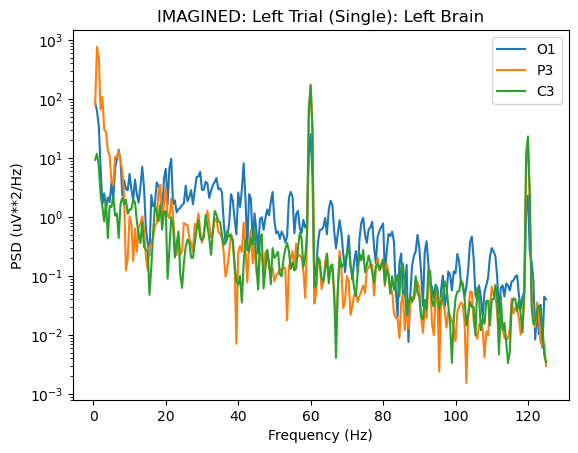

In [202]:
fig, axs = plt.subplots()
axs.semilogy(d1_o1_L_fw[1:], i_psdw1[0][1:], label='O1')
axs.semilogy(d1_p3_L_fw[1:], i_psdw2[0][1:], label='P3')
axs.semilogy(d1_c3_L_fw[1:], i_psdw3[0][1:], label='C3')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('IMAGINED: Left Trial (Single): Left Brain')
plt.show()

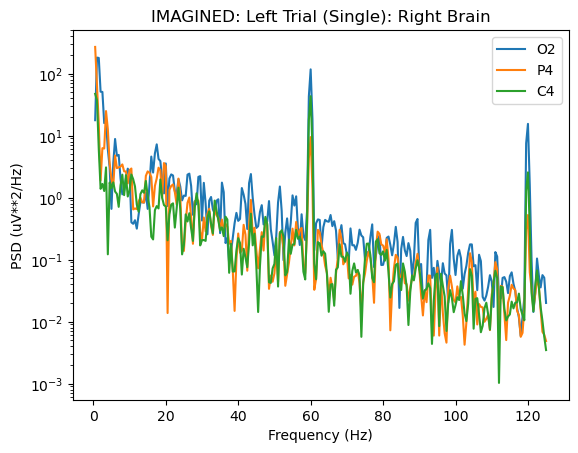

In [203]:
fig, axs = plt.subplots()
axs.semilogy(d1_o2_L_fw[1:], i_psdw4[0][1:], label='O2')
axs.semilogy(d1_p4_L_fw[1:], i_psdw5[0][1:], label='P4')
axs.semilogy(d1_c4_L_fw[1:], i_psdw6[0][1:], label='C4')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('IMAGINED: Left Trial (Single): Right Brain')
plt.show()

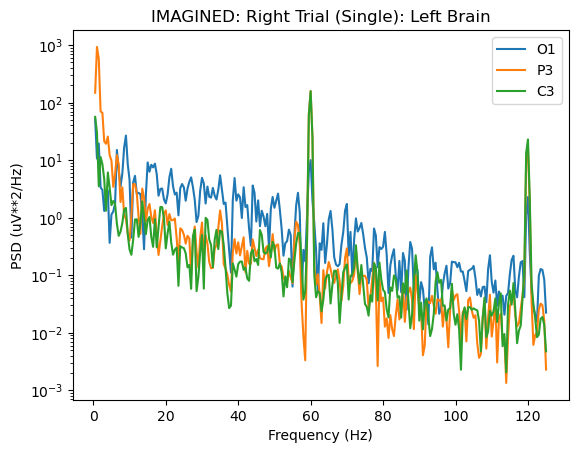

In [204]:
fig, axs = plt.subplots()
axs.semilogy(d1_o1_R_fw[1:], i_psdw7[0][1:], label='O1')
axs.semilogy(d1_p3_R_fw[1:], i_psdw8[0][1:], label='P3')
axs.semilogy(d1_c3_R_fw[1:], i_psdw9[0][1:], label='C3')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('IMAGINED: Right Trial (Single): Left Brain')
plt.show()

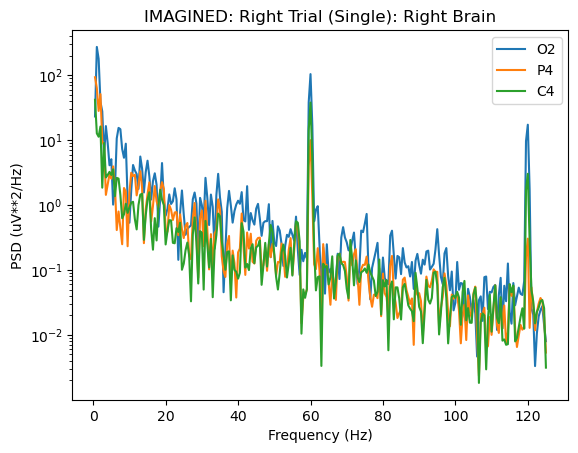

In [205]:
fig, axs = plt.subplots()
axs.semilogy(d1_o2_R_fw[1:], i_psdw10[0][1:], label='O2')
axs.semilogy(d1_p4_R_fw[1:], i_psdw11[0][1:], label='P4')
axs.semilogy(d1_c4_R_fw[1:], i_psdw12[0][1:], label='C4')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('IMAGINED: Right Trial (Single): Right Brain')
plt.show()

In [74]:
##ACTUAL

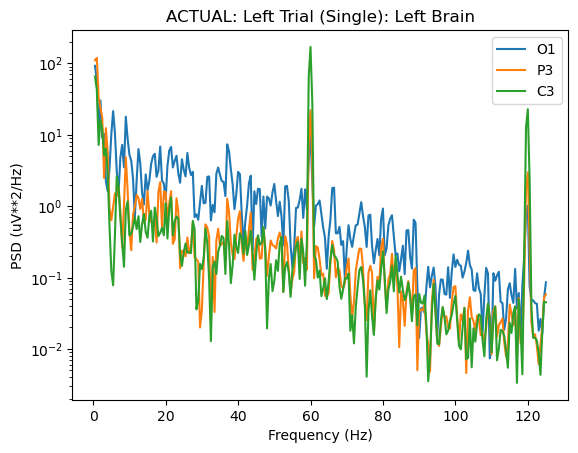

In [206]:

fig, axs = plt.subplots()
axs.semilogy(d2_o1_L_fw[1:], a_psdw1[0][1:], label='O1')
axs.semilogy(d2_p3_L_fw[1:], a_psdw2[0][1:], label='P3')
axs.semilogy(d2_c3_L_fw[1:], a_psdw3[0][1:], label='C3')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('ACTUAL: Left Trial (Single): Left Brain')
plt.show()

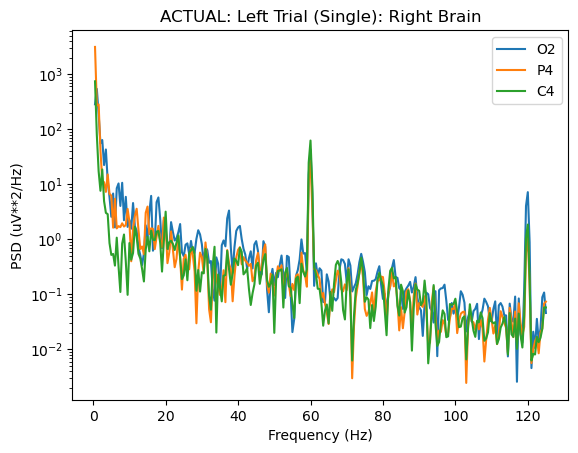

In [207]:
fig, axs = plt.subplots()
axs.semilogy(d2_o2_L_fw[1:], a_psdw4[0][1:], label='O2')
axs.semilogy(d2_p4_L_fw[1:], a_psdw5[0][1:], label='P4')
axs.semilogy(d2_c4_L_fw[1:], a_psdw6[0][1:], label='C4')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('ACTUAL: Left Trial (Single): Right Brain')
plt.show()

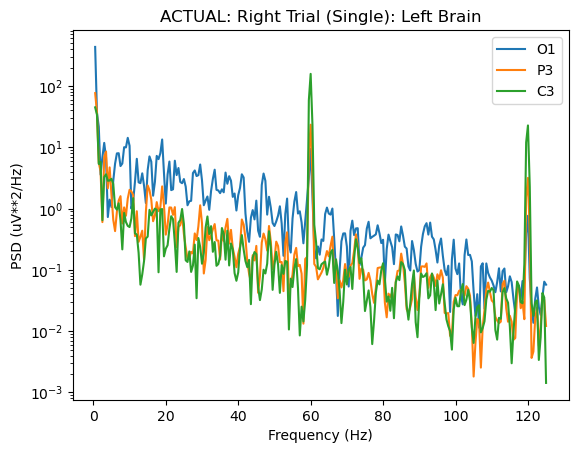

In [209]:
fig, axs = plt.subplots()
axs.semilogy(d2_o1_R_fw[1:], a_psdw7[0][1:], label='O1')
axs.semilogy(d2_p3_R_fw[1:], a_psdw8[0][1:], label='P3')
axs.semilogy(d2_c3_R_fw[1:], a_psdw9[0][1:], label='C3')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('ACTUAL: Right Trial (Single): Left Brain')
plt.show()

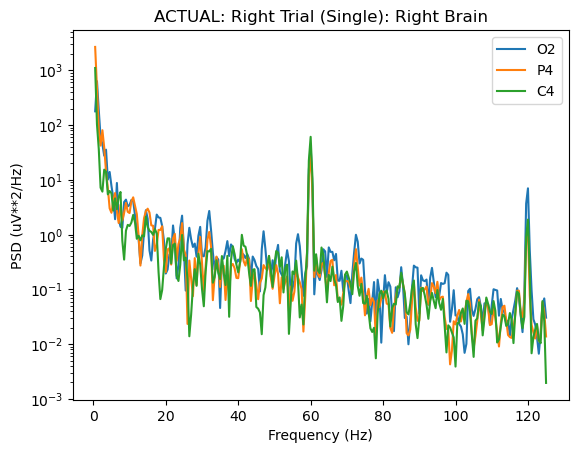

In [210]:
fig, axs = plt.subplots()
axs.semilogy(d2_o2_R_fw[1:], a_psdw10[0][1:], label='O2')
axs.semilogy(d2_p4_R_fw[1:], a_psdw11[0][1:], label='P4')
axs.semilogy(d2_c4_R_fw[1:], a_psdw12[0][1:], label='C4')

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
axs.legend(loc=1)
plt.title('ACTUAL: Right Trial (Single): Right Brain')
plt.show()

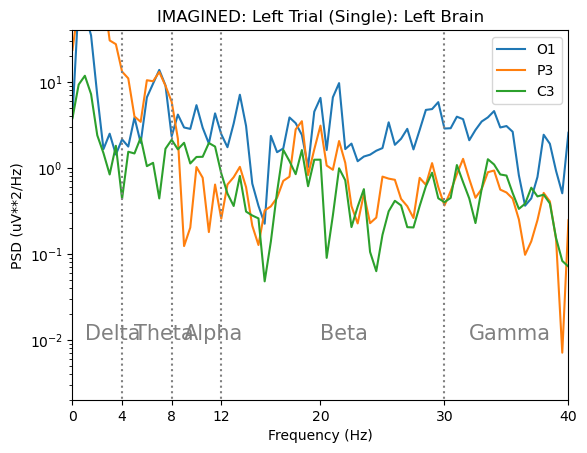

In [211]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d1_o1_L_fw, i_psdw1[0],label='O1')
axs.semilogy(d1_p3_L_fw, i_psdw2[0],label='P3')
axs.semilogy(d1_c3_L_fw, i_psdw3[0],label='C3')

#axs.semilogy(d1_o2_L_fw, i_psdw4[0],label='O1')
#axs.semilogy(d1_p4_L_fw, i_psdw5[0],label='P3')
#axs.semilogy(d1_c4_L_fw, i_psdw6[0],label='C3')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('IMAGINED: Left Trial (Single): Left Brain')

plt.show()


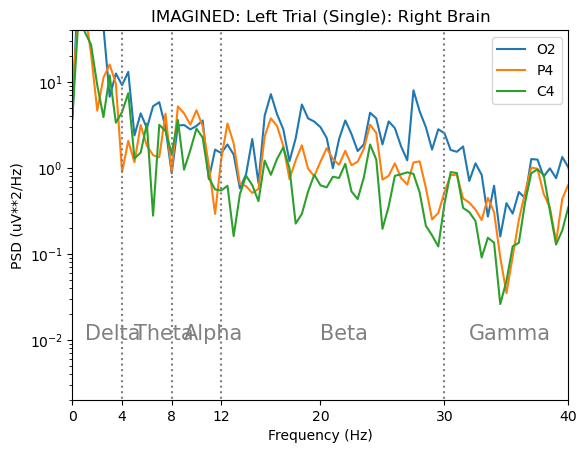

In [80]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d1_o2_L_fw, i_psdw4[0],label='O2')
axs.semilogy(d1_p4_L_fw, i_psdw5[0],label='P4')
axs.semilogy(d1_c4_L_fw, i_psdw6[0],label='C4')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('IMAGINED: Left Trial (Single): Right Brain')

plt.show()


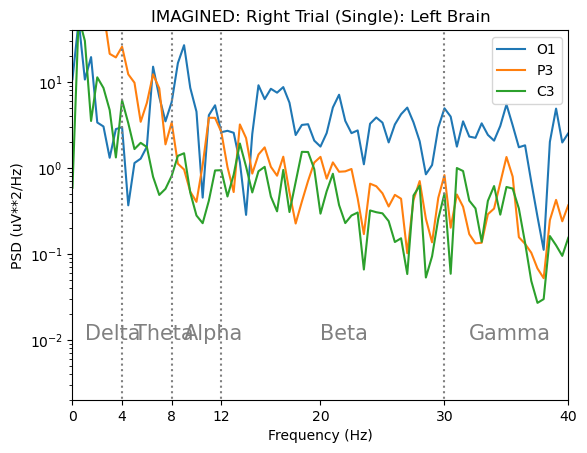

In [212]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d1_o1_R_fw, i_psdw7[0],label='O1')
axs.semilogy(d1_p3_R_fw, i_psdw8[0],label='P3')
axs.semilogy(d1_c3_R_fw, i_psdw9[0],label='C3')

#axs.semilogy(d1_o2_L_fw, i_psdw4[0],label='O1')
#axs.semilogy(d1_p4_L_fw, i_psdw5[0],label='P3')
#axs.semilogy(d1_c4_L_fw, i_psdw6[0],label='C3')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('IMAGINED: Right Trial (Single): Left Brain')

plt.show()


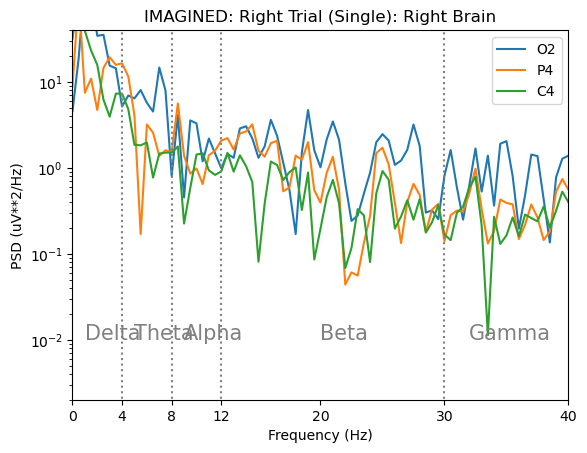

In [82]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d1_o2_R_fw, i_psdw10[0],label='O2')
axs.semilogy(d1_p4_R_fw, i_psdw11[0],label='P4')
axs.semilogy(d1_c4_R_fw, i_psdw12[0],label='C4')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('IMAGINED: Right Trial (Single): Right Brain')

plt.show()


In [83]:
##ACTUAL

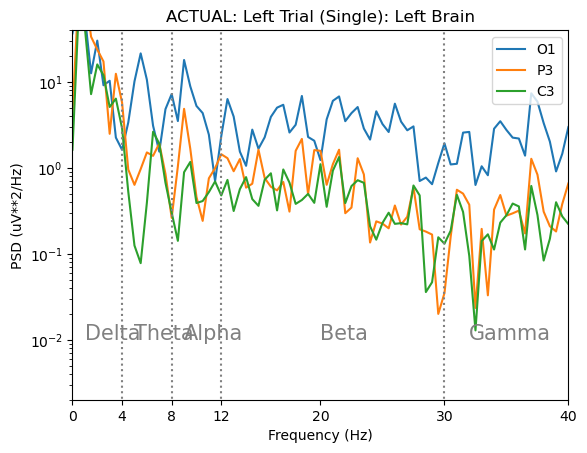

In [213]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d2_o1_L_fw, a_psdw1[0],label='O1')
axs.semilogy(d2_p3_L_fw, a_psdw2[0],label='P3')
axs.semilogy(d2_c3_L_fw, a_psdw3[0],label='C3')

#axs.semilogy(d1_o2_L_fw, i_psdw4[0],label='O1')
#axs.semilogy(d1_p4_L_fw, i_psdw5[0],label='P3')
#axs.semilogy(d1_c4_L_fw, i_psdw6[0],label='C3')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('ACTUAL: Left Trial (Single): Left Brain')

plt.show()


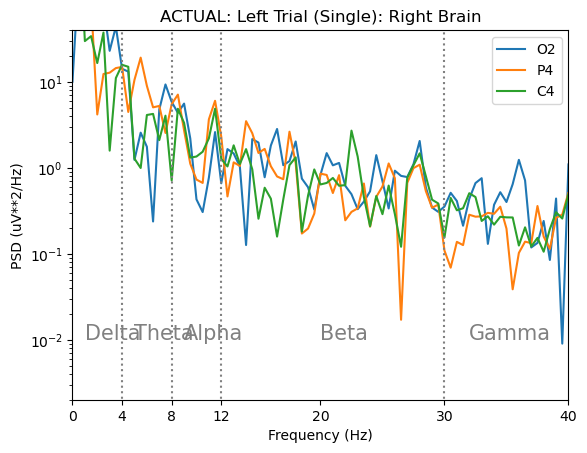

In [85]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d2_o2_L_fw, a_psdw4[0],label='O2')
axs.semilogy(d2_p4_L_fw, a_psdw5[0],label='P4')
axs.semilogy(d2_c4_L_fw, a_psdw6[0],label='C4')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('ACTUAL: Left Trial (Single): Right Brain')

plt.show()


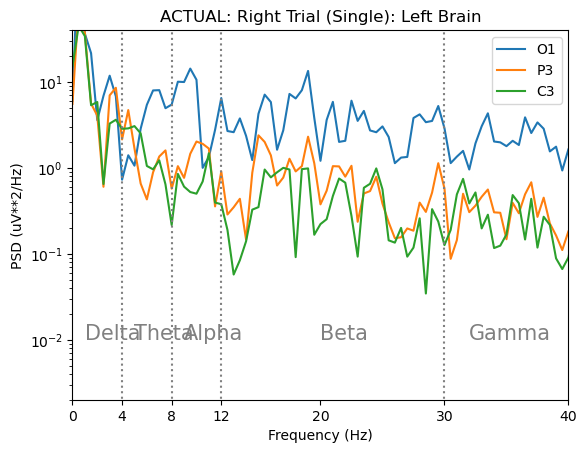

In [214]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d2_o1_R_fw, a_psdw7[0],label='O1')
axs.semilogy(d2_p3_R_fw, a_psdw8[0],label='P3')
axs.semilogy(d2_c3_R_fw, a_psdw9[0],label='C3')

#axs.semilogy(d1_o2_L_fw, i_psdw4[0],label='O1')
#axs.semilogy(d1_p4_L_fw, i_psdw5[0],label='P3')
#axs.semilogy(d1_c4_L_fw, i_psdw6[0],label='C3')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('ACTUAL: Right Trial (Single): Left Brain')

plt.show()


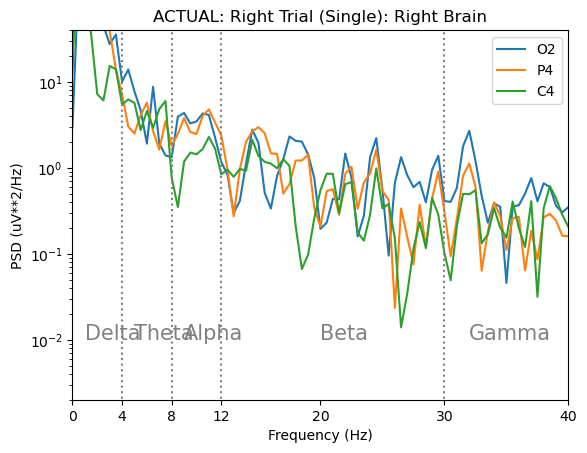

In [215]:
# Zoom in to 0-40Hz range

xtickslist_f = [0,4,8,12,20,30,40]

fig, axs = plt.subplots()

axs.semilogy(d2_o2_R_fw, a_psdw10[0],label='O2')
axs.semilogy(d2_p4_R_fw, a_psdw11[0],label='P4')
axs.semilogy(d2_c4_R_fw, a_psdw12[0],label='C4')

# for num_r in range(0,4):
#     axs.semilogy(fw, psdw[num_r],label=num_r)

axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('PSD (uV**2/Hz)')
xmax = 40; ymax = 40; ymin = 0.002
axs.set_xlim(0,xmax)
axs.set_ylim(ymin,ymax)
axs.set_xticks(xtickslist_f)
axs.legend(loc=1)

axs.vlines(4,0,ymax,color='grey',linestyle='dotted')
axs.vlines(8,0,ymax,color='grey',linestyle='dotted')
axs.vlines(12,0,ymax,color='grey',linestyle='dotted')
axs.vlines(30,0,ymax,color='grey',linestyle='dotted')
axs.text(1, 0.01, 'Delta', size=15, color='grey')
axs.text(5, 0.01, 'Theta', size=15, color='grey')
axs.text(9, 0.01, 'Alpha', size=15, color='grey')
axs.text(20, 0.01, 'Beta', size=15, color='grey')
axs.text(32, 0.01, 'Gamma', size=15, color='grey')
plt.title('ACTUAL: Right Trial (Single): Right Brain')

plt.show()


Text(0.5, 0.98, 'IMAGINED: Single Trial (Left): Left Brain (Raw)')

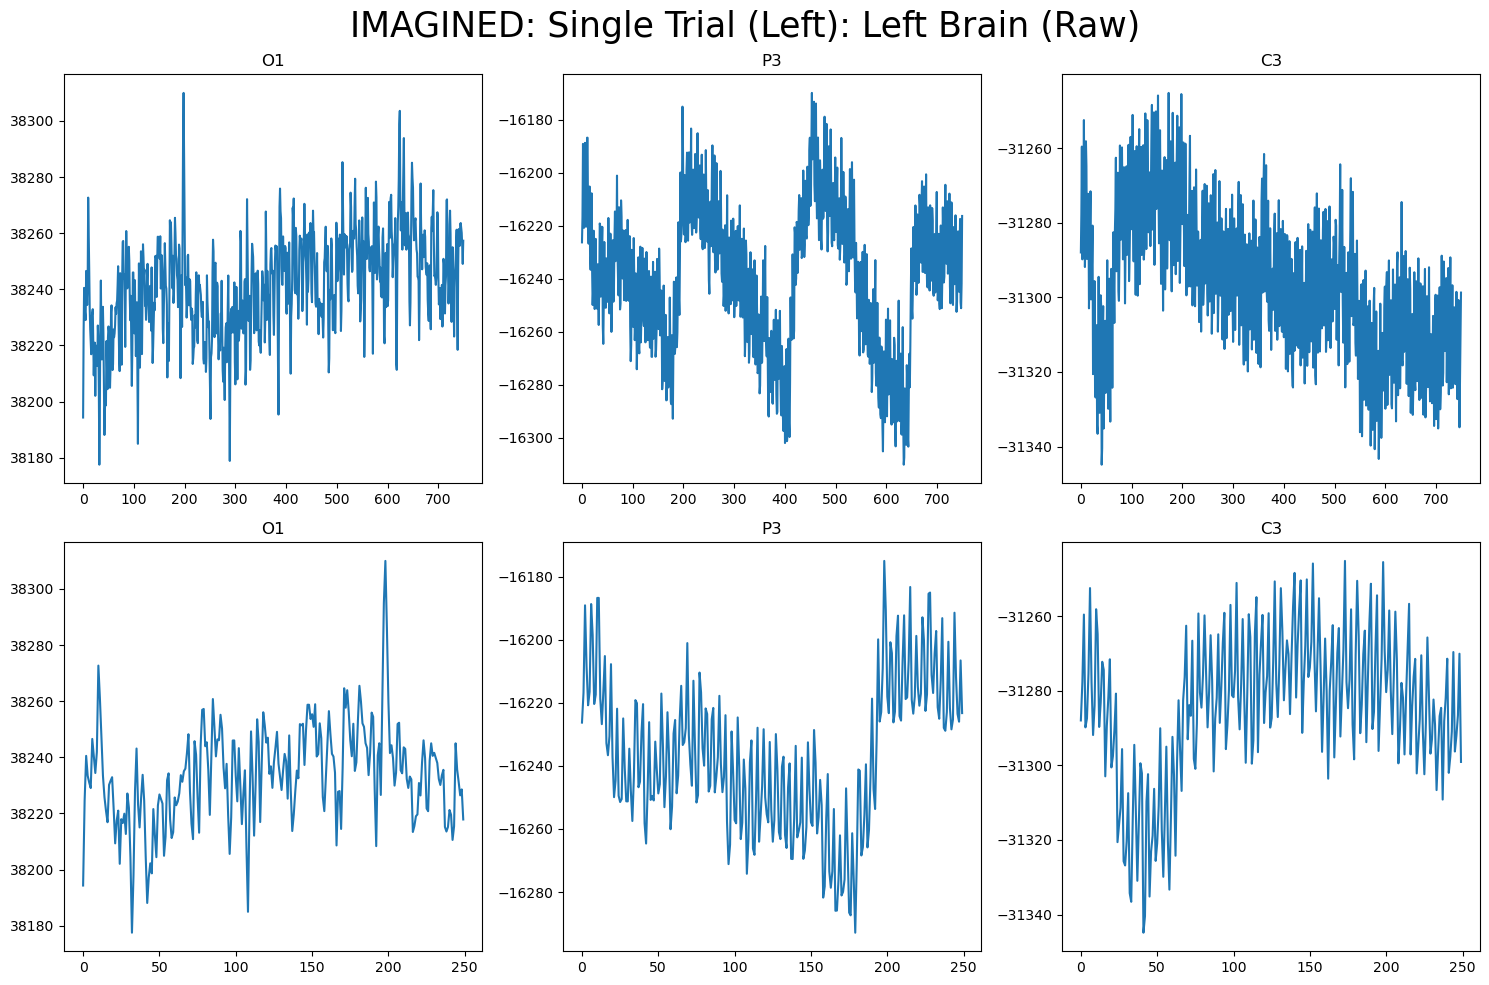

In [216]:
#subplots for raw data of a single trial (Left trial) Left Brain
#row1(Left): O1, P3, C3
#row2(Left,rest): O1, P3, C3

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d1_LS_i[trial]
trial_end = trial_start+750

rest_start = d1_LS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d1_channels[6][trial_start:trial_end])
axs[0,1].plot(d1_channels[3][trial_start:trial_end])
axs[0,2].plot(d1_channels[0][trial_start:trial_end])

#row2
axs[1,0].plot(d1_channels[6][rest_start:rest_end])
axs[1,1].plot(d1_channels[3][rest_start:rest_end])
axs[1,2].plot(d1_channels[0][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("IMAGINED: Single Trial (Left): Left Brain (Raw)", fontsize=25)

In [89]:
len(d2_LS_i)

49

Text(0.5, 0.98, 'IMAGINED: Average Trials (Left): Left Brain (Raw)')

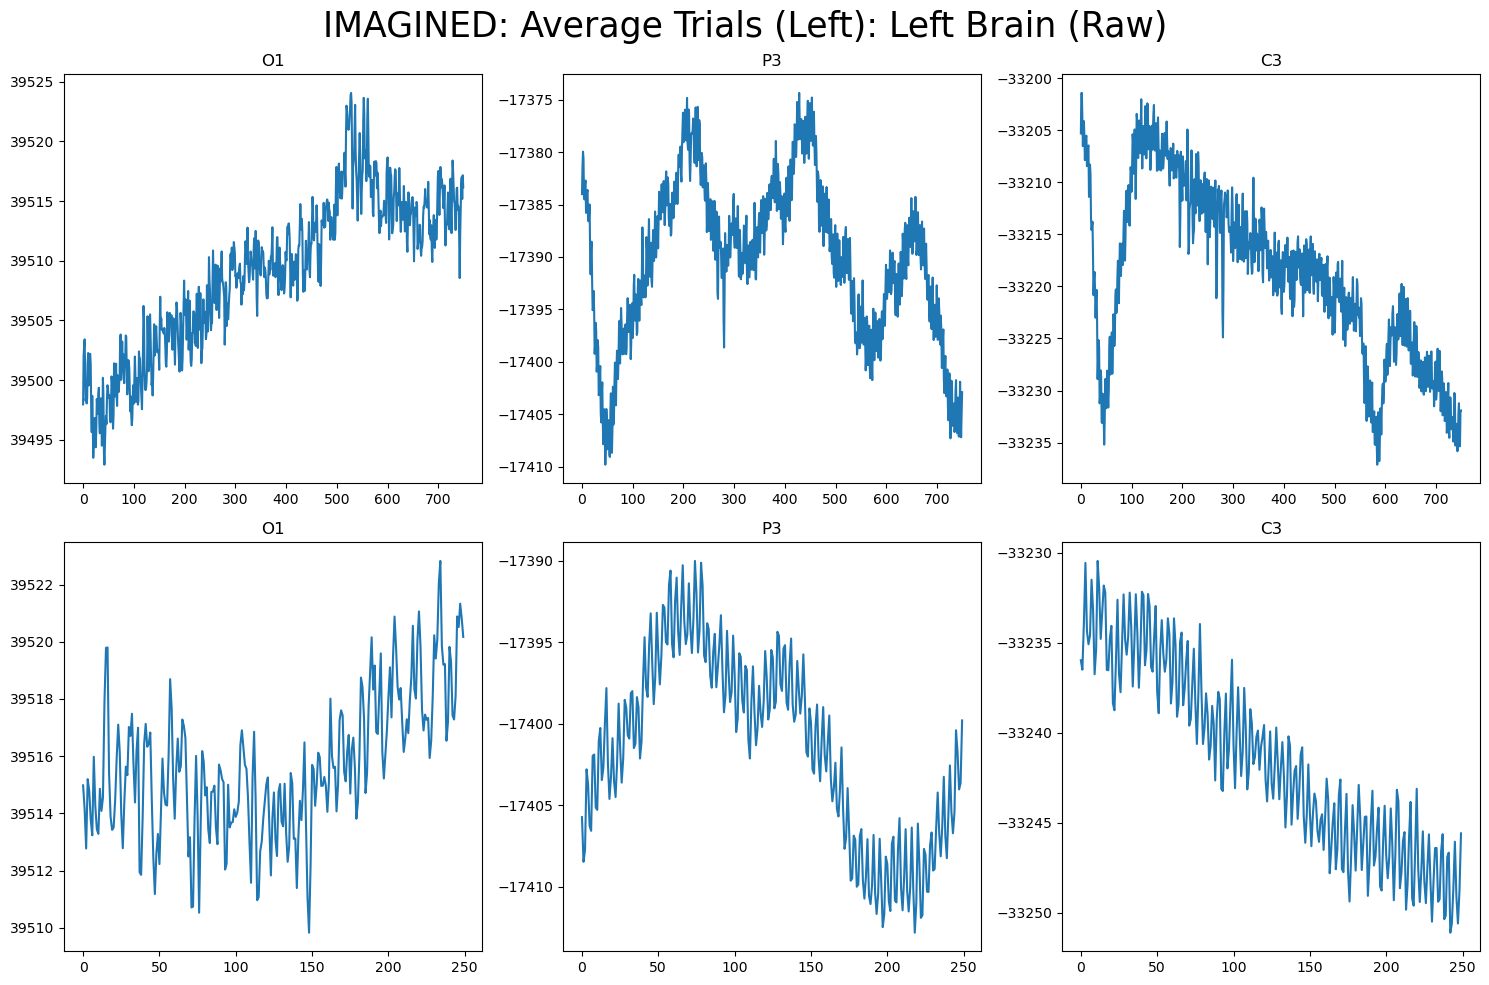

In [217]:
#subplots for raw data of a single trial (Left trial) Left Brain AVERAGE
#row1(Left): O1, P3, C3
#row2(Left,rest): O1, P3, C3
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O1_avg_trial = []
P3_avg_trial = []
C3_avg_trial = []
O1_avg_rest  = []
P3_avg_rest  = []
C3_avg_rest  = []

num_trials = len(d1_LS_i)

for i in range(750):
    O1_iter_sum_t = 0
    P3_iter_sum_t = 0
    C3_iter_sum_t = 0
    
    for trial in d1_LS_i:
        O1_iter_sum_t += d1_channels[6][trial+i][0]
        P3_iter_sum_t += d1_channels[3][trial+i][0]
        C3_iter_sum_t += d1_channels[0][trial+i][0]
        
    O1_avg_trial.append(O1_iter_sum_t/num_trials)
    P3_avg_trial.append(P3_iter_sum_t/num_trials)
    C3_avg_trial.append(C3_iter_sum_t/num_trials)
    
for i in range(250):
    O1_iter_sum_r = 0
    P3_iter_sum_r = 0
    C3_iter_sum_r = 0
    
    for trial in d1_LS_i:
        O1_iter_sum_r += d1_channels[6][trial+i+750][0]
        P3_iter_sum_r += d1_channels[3][trial+i+750][0]
        C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O1_avg_rest.append(O1_iter_sum_r/num_trials)
    P3_avg_rest.append(P3_iter_sum_r/num_trials)
    C3_avg_rest.append(C3_iter_sum_r/num_trials)
    
#row1
axs[0,0].plot(O1_avg_trial)
axs[0,1].plot(P3_avg_trial)
axs[0,2].plot(C3_avg_trial)

#row2
axs[1,0].plot(O1_avg_rest)
axs[1,1].plot(P3_avg_rest)
axs[1,2].plot(C3_avg_rest)

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("IMAGINED: Average Trials (Left): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'IMAGINED: Single Trial (Left): Right Brain (Raw)')

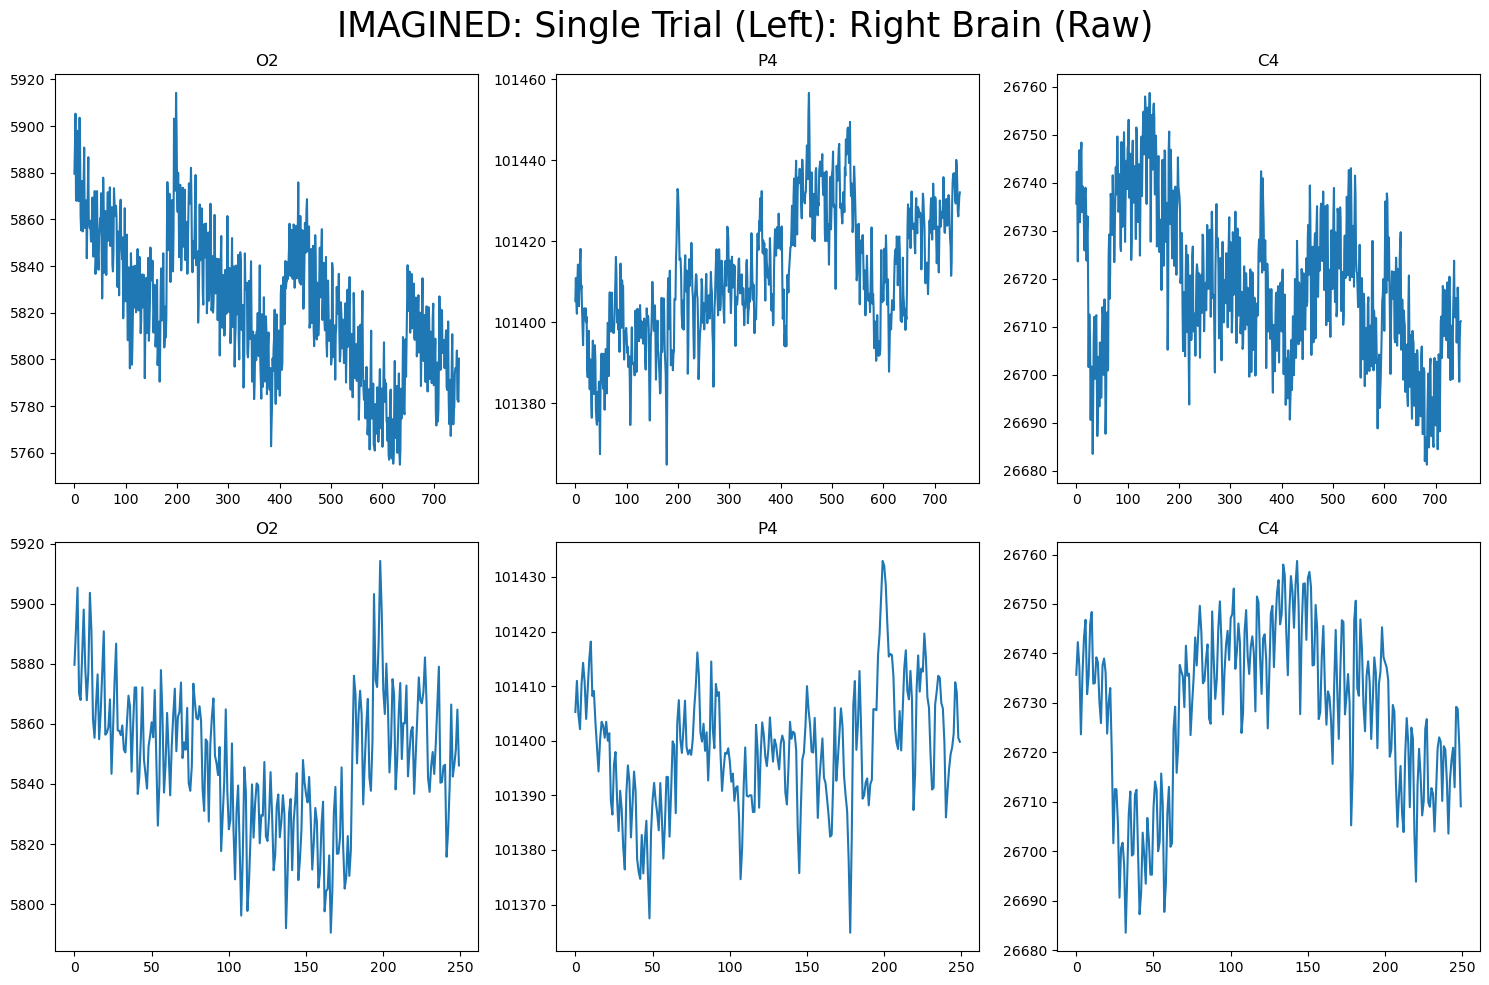

In [91]:
#subplots for raw data of a single trial (Left Trial) Right Brain
#row3(right): O2, P4, C4
#row4(right,rest) O2, P4, C4

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d1_LS_i[trial]
trial_end = trial_start+750

rest_start = d1_LS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d1_channels[7][trial_start:trial_end])
axs[0,1].plot(d1_channels[5][trial_start:trial_end])
axs[0,2].plot(d1_channels[2][trial_start:trial_end])

#row2
axs[1,0].plot(d1_channels[7][rest_start:rest_end])
axs[1,1].plot(d1_channels[5][rest_start:rest_end])
axs[1,2].plot(d1_channels[2][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')

fig.suptitle("IMAGINED: Single Trial (Left): Right Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'IMAGINED: Average Trials (Left): Right Brain (Raw)')

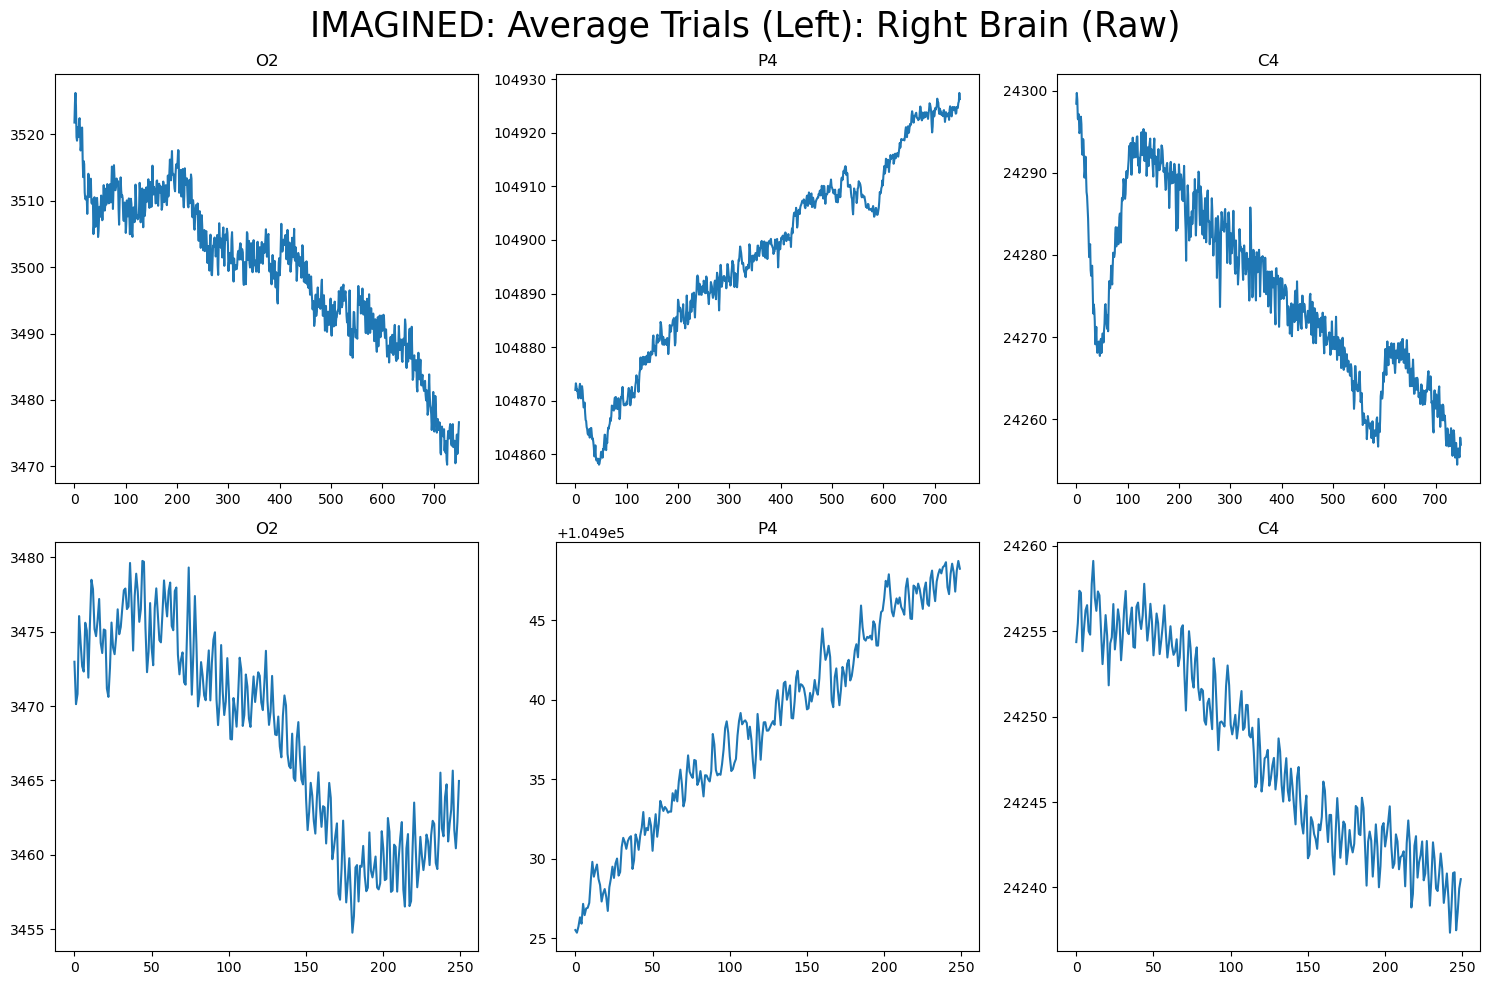

In [218]:
#subplots for raw data of a single trial (Left trial) Right Brain AVERAGE
#row1(Left): O1, P3, C3
#row2(Left,rest): O1, P3, C3
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O2_avg_trial = []
P4_avg_trial = []
C4_avg_trial = []
O2_avg_rest  = []
P4_avg_rest  = []
C4_avg_rest  = []

num_trials = len(d1_LS_i)

for i in range(750):
    O2_iter_sum = 0
    P4_iter_sum = 0
    C4_iter_sum = 0
    
    for trial in d1_LS_i:
        O2_iter_sum += d1_channels[7][trial+i][0]
        P4_iter_sum += d1_channels[5][trial+i][0]
        C4_iter_sum += d1_channels[2][trial+i][0]
        
    O2_avg_trial.append(O2_iter_sum/num_trials)
    P4_avg_trial.append(P4_iter_sum/num_trials)
    C4_avg_trial.append(C4_iter_sum/num_trials)
    
for i in range(250):
    O2_iter_sum_r = 0
    P4_iter_sum_r = 0
    C4_iter_sum_r = 0
    
    for trial in d1_LS_i:
        O2_iter_sum_r += d1_channels[7][trial+i+750][0]
        P4_iter_sum_r += d1_channels[5][trial+i+750][0]
        C4_iter_sum_r += d1_channels[2][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O2_avg_rest.append(O2_iter_sum_r/num_trials)
    P4_avg_rest.append(P4_iter_sum_r/num_trials)
    C4_avg_rest.append(C4_iter_sum_r/num_trials)
    
    
#row1
axs[0,0].plot(O2_avg_trial)
axs[0,1].plot(P4_avg_trial)
axs[0,2].plot(C4_avg_trial)

#row2
axs[1,0].plot(O2_avg_rest)
axs[1,1].plot(P4_avg_rest)
axs[1,2].plot(C4_avg_rest)

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')       
        
fig.suptitle("IMAGINED: Average Trials (Left): Right Brain (Raw)", fontsize=25)

In [93]:
#IMAGINED RIGHT TRIAL

Text(0.5, 0.98, 'IMAGINED: Single Trial (Right): Left Brain (Raw)')

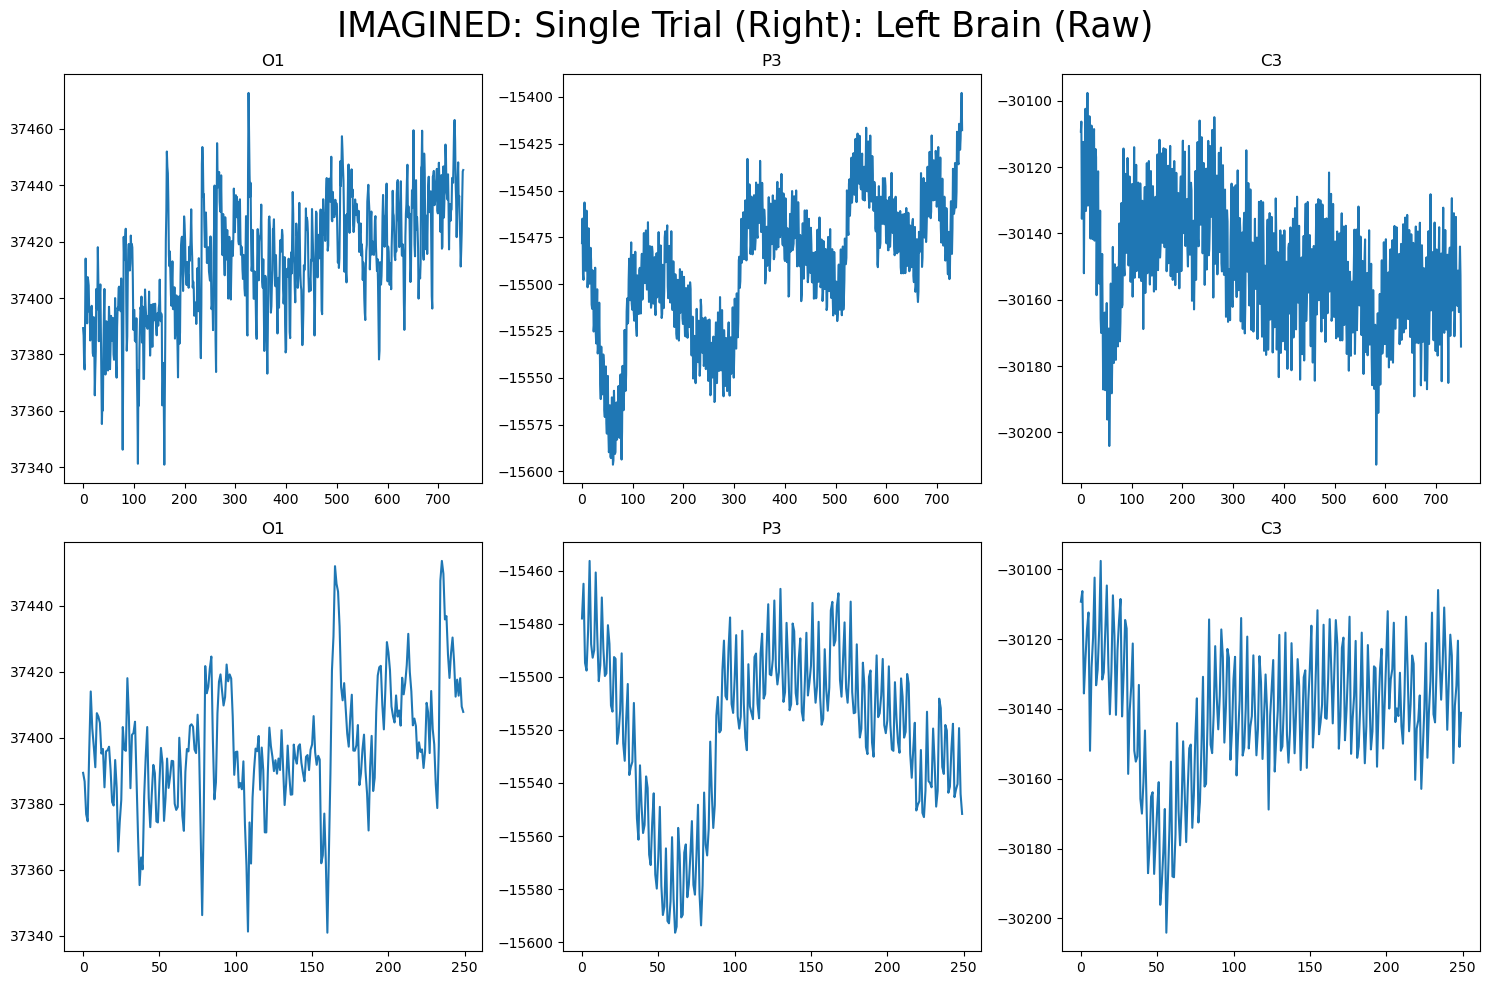

In [219]:
#subplots for raw data of a single trial (Right trial) Left brain
#row1(Left): O1, P3, C3
#row2(Left,rest): O1, P3, C3

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d1_RS_i[trial]
trial_end = trial_start+750

rest_start = d1_RS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d1_channels[6][trial_start:trial_end])
axs[0,1].plot(d1_channels[3][trial_start:trial_end])
axs[0,2].plot(d1_channels[0][trial_start:trial_end])

#row2
axs[1,0].plot(d1_channels[6][rest_start:rest_end])
axs[1,1].plot(d1_channels[3][rest_start:rest_end])
axs[1,2].plot(d1_channels[0][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("IMAGINED: Single Trial (Right): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'IMAGINED: Average Trials (Right): Left Brain (Raw)')

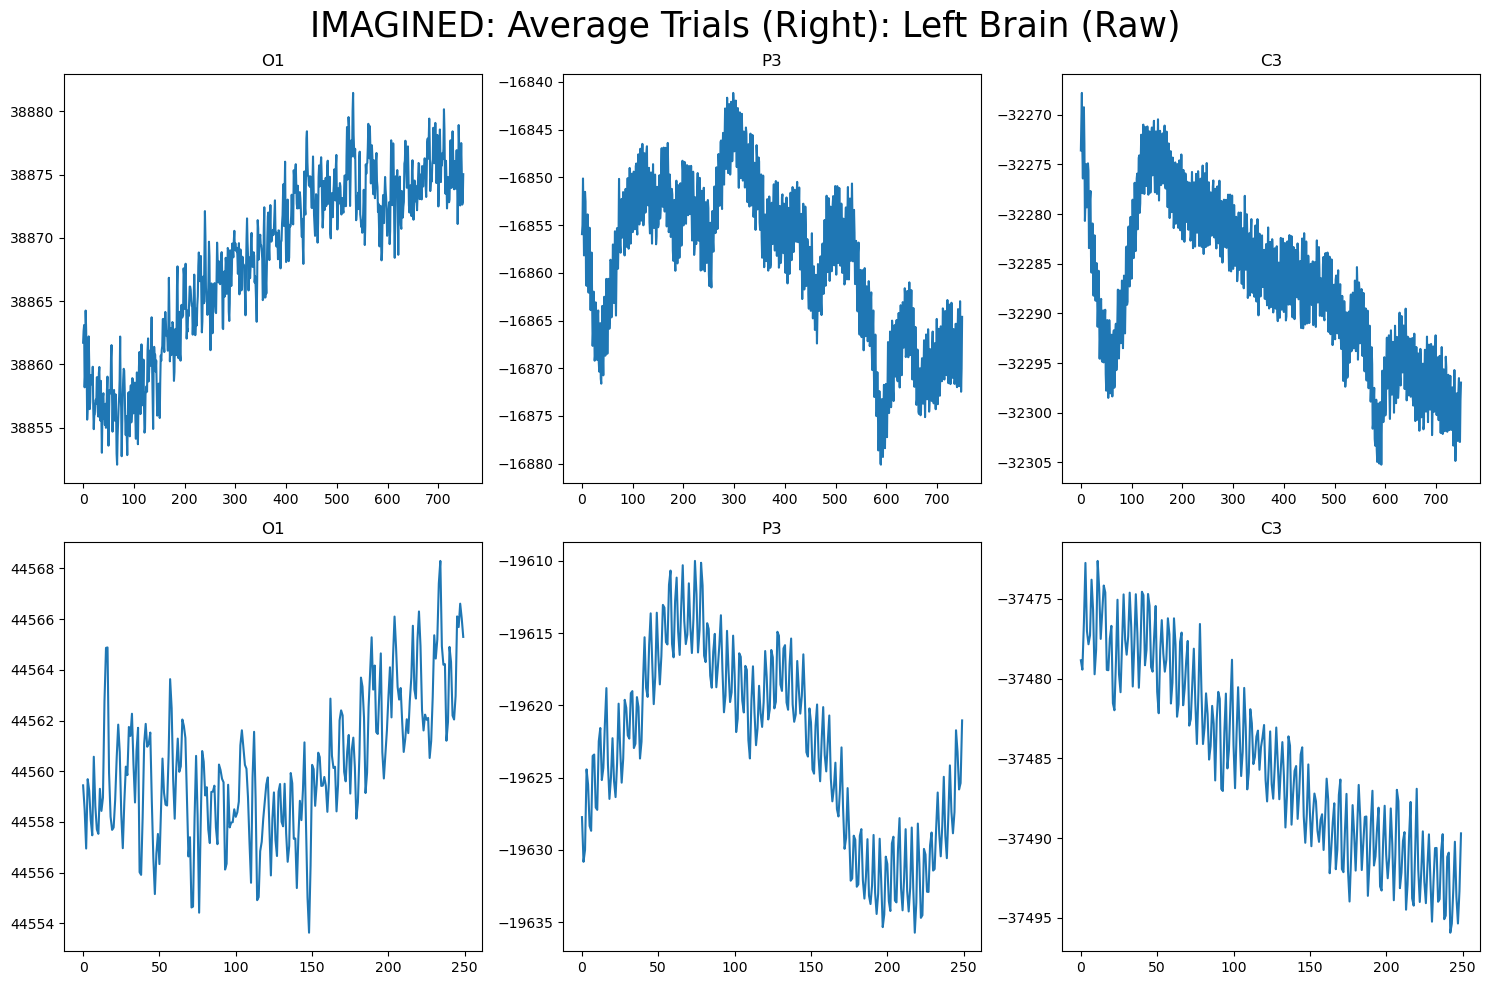

In [95]:
#right trial left brain average
#row1(Left): O1, P3, C3
#row2(Left,rest): O1, P3, C3
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O1_avg_trial = []
P3_avg_trial = []
C3_avg_trial = []
O1_avg_rest  = []
P3_avg_rest  = []
C3_avg_rest  = []

num_trials = len(d1_RS_i)

for i in range(750):
    O1_iter_sum_t = 0
    P3_iter_sum_t = 0
    C3_iter_sum_t = 0
    
    for trial in d1_RS_i:
        O1_iter_sum_t += d1_channels[6][trial+i][0]
        P3_iter_sum_t += d1_channels[3][trial+i][0]
        C3_iter_sum_t += d1_channels[0][trial+i][0]
        
    O1_avg_trial.append(O1_iter_sum_t/num_trials)
    P3_avg_trial.append(P3_iter_sum_t/num_trials)
    C3_avg_trial.append(C3_iter_sum_t/num_trials)
    
for i in range(250):
    O1_iter_sum_r = 0
    P3_iter_sum_r = 0
    C3_iter_sum_r = 0
    
    for trial in d1_LS_i:
        O1_iter_sum_r += d1_channels[6][trial+i+750][0]
        P3_iter_sum_r += d1_channels[3][trial+i+750][0]
        C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O1_avg_rest.append(O1_iter_sum_r/num_trials)
    P3_avg_rest.append(P3_iter_sum_r/num_trials)
    C3_avg_rest.append(C3_iter_sum_r/num_trials)
    
#row1
axs[0,0].plot(O1_avg_trial)
axs[0,1].plot(P3_avg_trial)
axs[0,2].plot(C3_avg_trial)

#row2
axs[1,0].plot(O1_avg_rest)
axs[1,1].plot(P3_avg_rest)
axs[1,2].plot(C3_avg_rest)

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("IMAGINED: Average Trials (Right): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'IMAGINED: Single Trial (Right): Right Brain (Raw)')

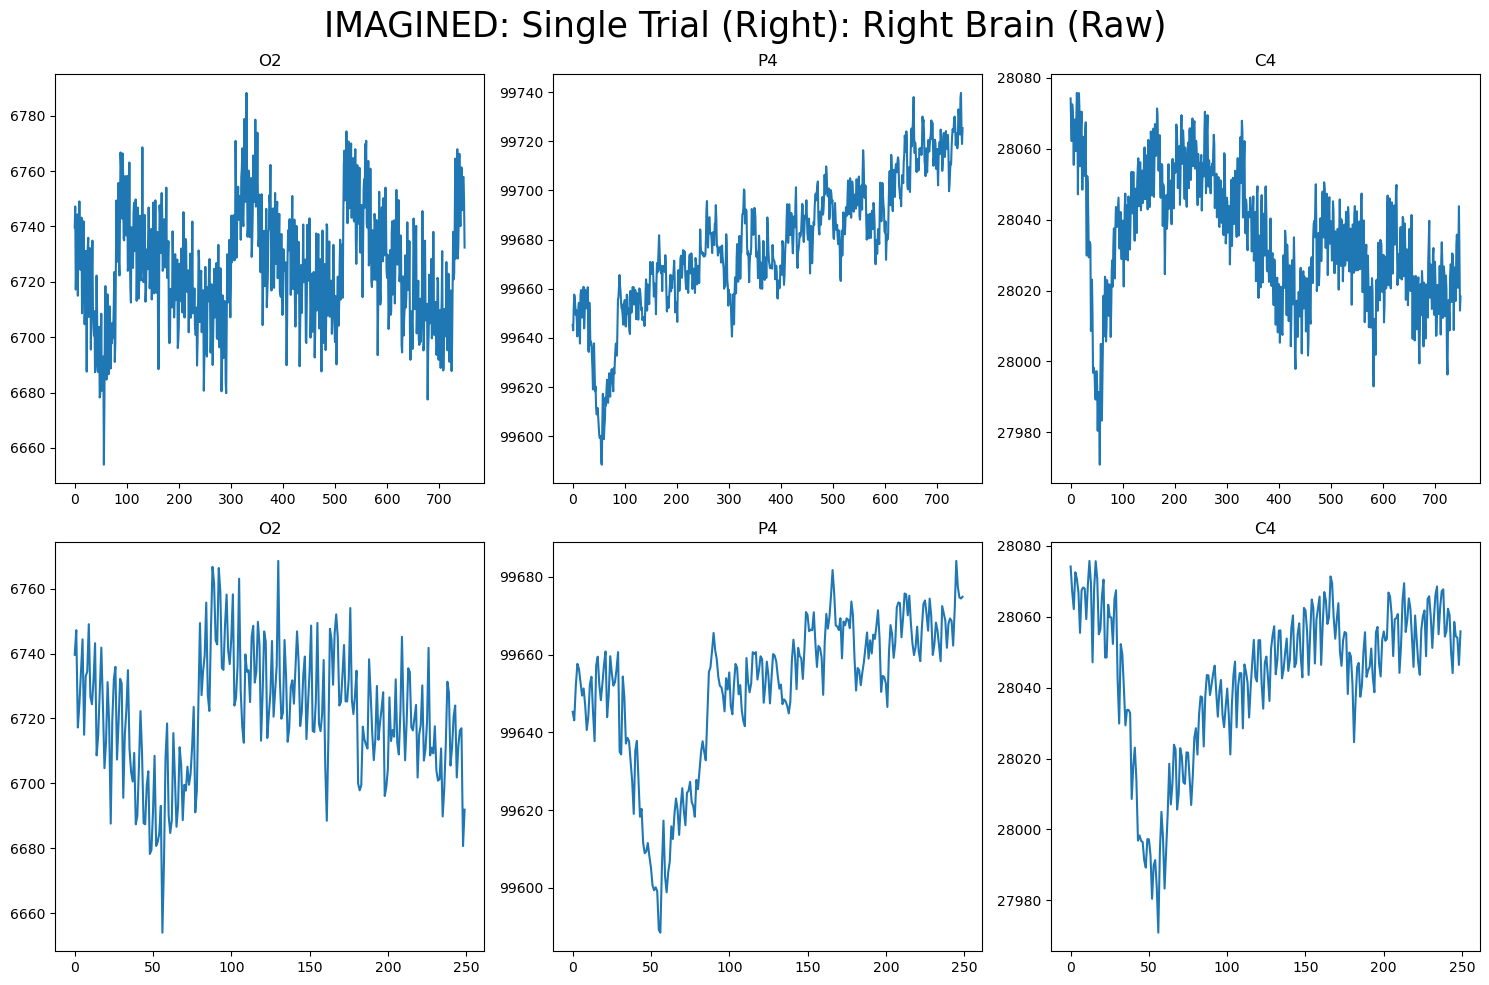

In [96]:
#subplots for raw data of a single trial (Right Trial) Right Brain
#row3(right): O2, P4, C4
#row4(right,rest) O2, P4, C4

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d1_RS_i[trial]
trial_end = trial_start+750

rest_start = d1_RS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d1_channels[7][trial_start:trial_end])
axs[0,1].plot(d1_channels[5][trial_start:trial_end])
axs[0,2].plot(d1_channels[2][trial_start:trial_end])

#row2
axs[1,0].plot(d1_channels[7][rest_start:rest_end])
axs[1,1].plot(d1_channels[5][rest_start:rest_end])
axs[1,2].plot(d1_channels[2][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')

fig.suptitle("IMAGINED: Single Trial (Right): Right Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'IMAGINED: Average Trials (Right): Right Brain (Raw)')

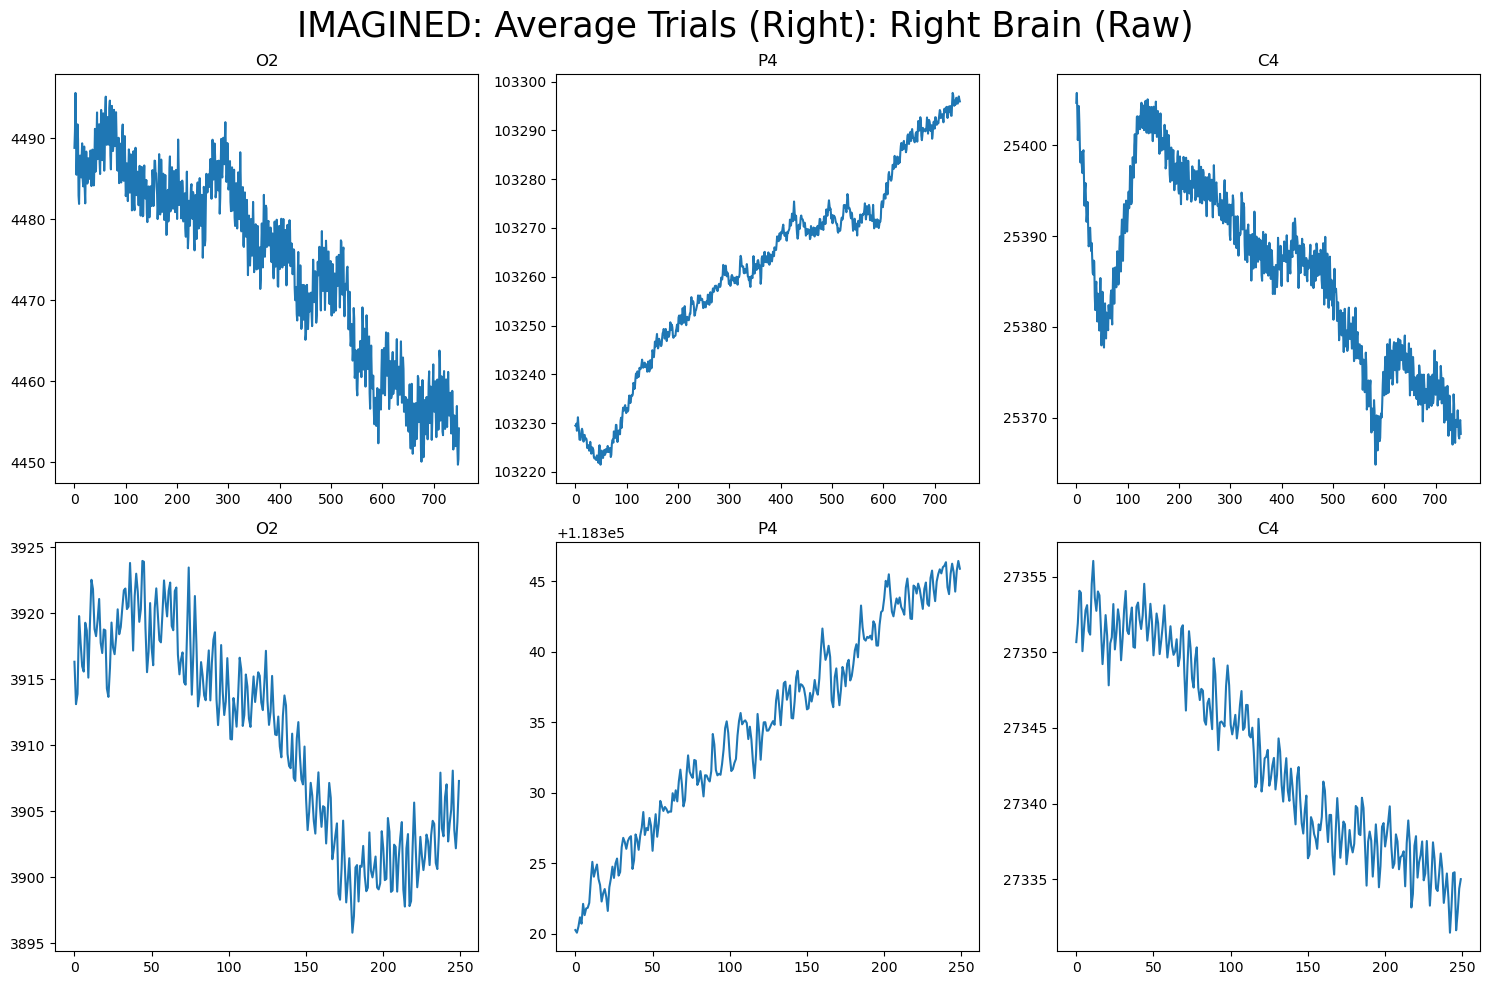

In [97]:
#right trial right brain AVERAGE
#row1(Left): O1, P3, C3
#row2(Left,rest): O1, P3, C3
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O2_avg_trial = []
P4_avg_trial = []
C4_avg_trial = []
O2_avg_rest  = []
P4_avg_rest  = []
C4_avg_rest  = []

num_trials = len(d1_RS_i)

for i in range(750):
    O2_iter_sum = 0
    P4_iter_sum = 0
    C4_iter_sum = 0
    
    for trial in d1_RS_i:
        O2_iter_sum += d1_channels[7][trial+i][0]
        P4_iter_sum += d1_channels[5][trial+i][0]
        C4_iter_sum += d1_channels[2][trial+i][0]
        
    O2_avg_trial.append(O2_iter_sum/num_trials)
    P4_avg_trial.append(P4_iter_sum/num_trials)
    C4_avg_trial.append(C4_iter_sum/num_trials)
    
for i in range(250):
    O2_iter_sum_r = 0
    P4_iter_sum_r = 0
    C4_iter_sum_r = 0
    
    for trial in d1_LS_i:
        O2_iter_sum_r += d1_channels[7][trial+i+750][0]
        P4_iter_sum_r += d1_channels[5][trial+i+750][0]
        C4_iter_sum_r += d1_channels[2][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O2_avg_rest.append(O2_iter_sum_r/num_trials)
    P4_avg_rest.append(P4_iter_sum_r/num_trials)
    C4_avg_rest.append(C4_iter_sum_r/num_trials)
    
    
#row1
axs[0,0].plot(O2_avg_trial)
axs[0,1].plot(P4_avg_trial)
axs[0,2].plot(C4_avg_trial)

#row2
axs[1,0].plot(O2_avg_rest)
axs[1,1].plot(P4_avg_rest)
axs[1,2].plot(C4_avg_rest)

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')       
        
fig.suptitle("IMAGINED: Average Trials (Right): Right Brain (Raw)", fontsize=25)

In [98]:
#############################

In [99]:
#ACTUAL

Text(0.5, 0.98, 'ACTUAL: Single Trial (Left): Left Brain (Raw)')

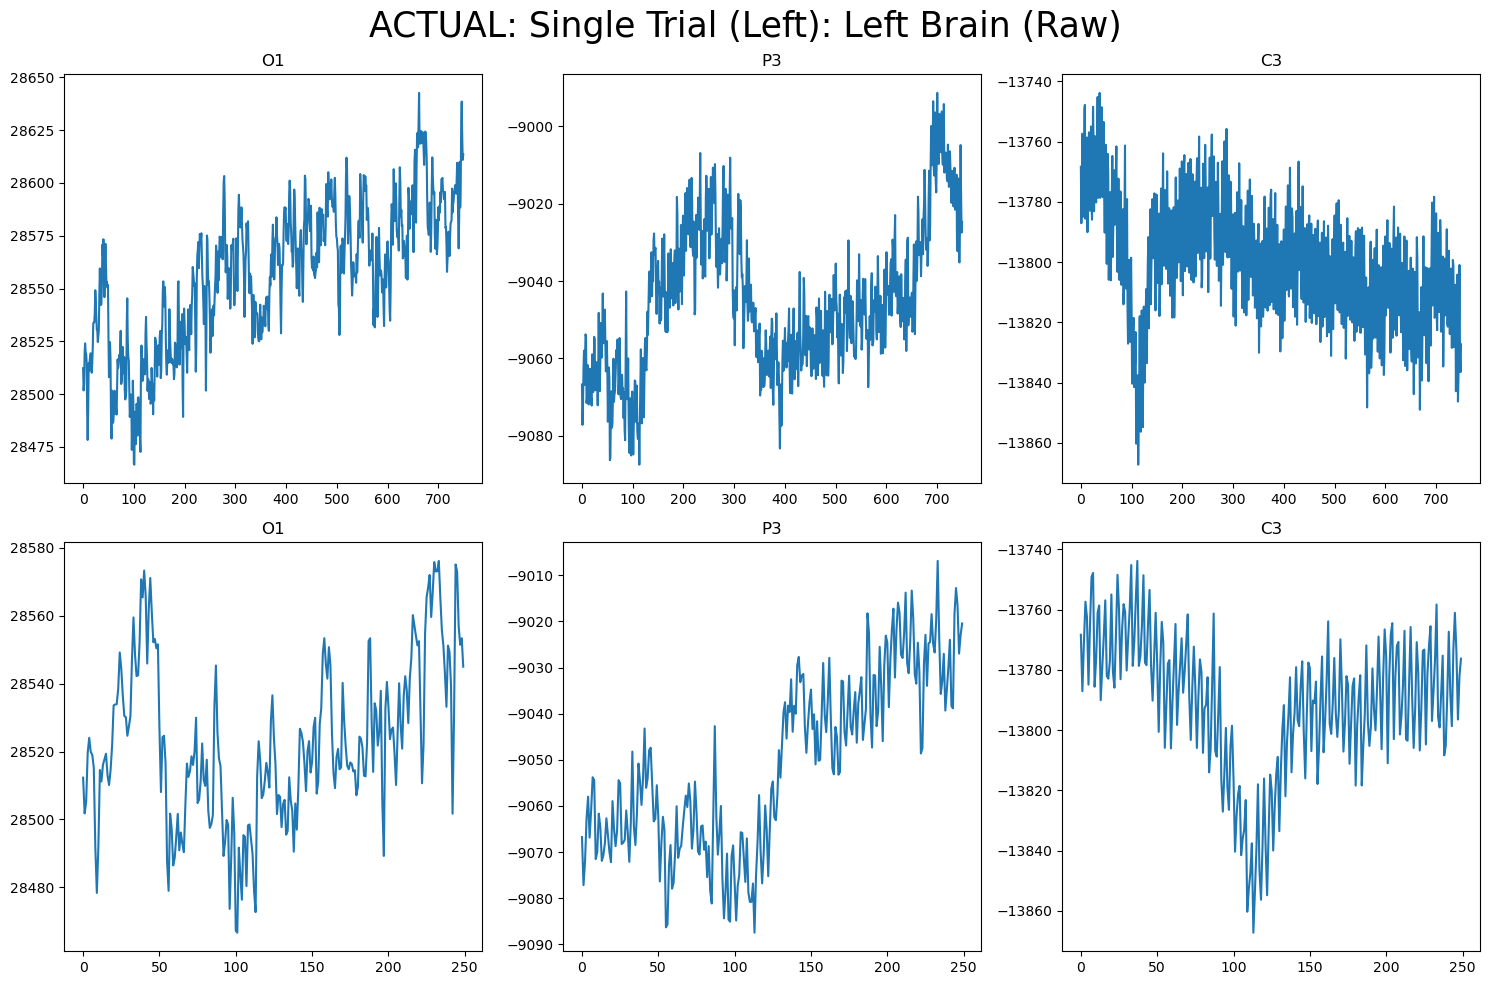

In [100]:
#single trial left, left brain

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d2_LS_i[trial]
trial_end = trial_start+750

rest_start = d2_LS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d2_channels[6][trial_start:trial_end])
axs[0,1].plot(d2_channels[3][trial_start:trial_end])
axs[0,2].plot(d2_channels[0][trial_start:trial_end])

#row2
axs[1,0].plot(d2_channels[6][rest_start:rest_end])
axs[1,1].plot(d2_channels[3][rest_start:rest_end])
axs[1,2].plot(d2_channels[0][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("ACTUAL: Single Trial (Left): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Average Trials (Left): Left Brain (Raw)')

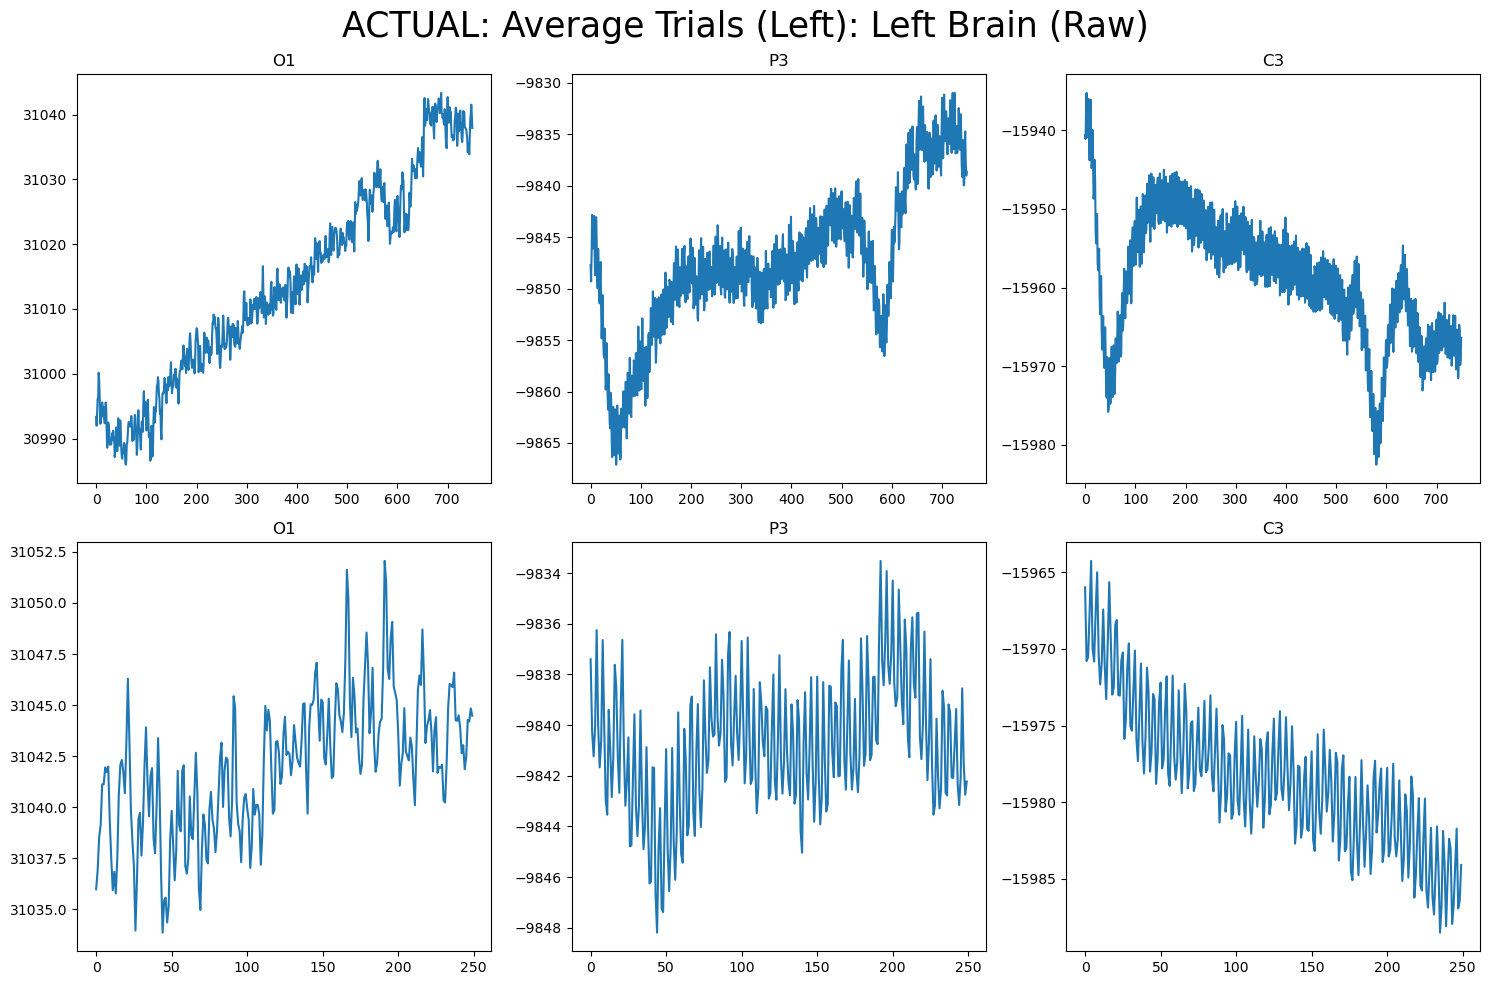

In [101]:
#avg trial left, left brain
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O1_avg_trial = []
P3_avg_trial = []
C3_avg_trial = []
O1_avg_rest  = []
P3_avg_rest  = []
C3_avg_rest  = []

num_trials = len(d2_LS_i)

for i in range(750):
    O1_iter_sum_t = 0
    P3_iter_sum_t = 0
    C3_iter_sum_t = 0
    
    for trial in d2_LS_i:
        O1_iter_sum_t += d2_channels[6][trial+i][0]
        P3_iter_sum_t += d2_channels[3][trial+i][0]
        C3_iter_sum_t += d2_channels[0][trial+i][0]
        
    O1_avg_trial.append(O1_iter_sum_t/num_trials)
    P3_avg_trial.append(P3_iter_sum_t/num_trials)
    C3_avg_trial.append(C3_iter_sum_t/num_trials)
    
for i in range(250):
    O1_iter_sum_r = 0
    P3_iter_sum_r = 0
    C3_iter_sum_r = 0
    
    for trial in d2_LS_i:
        O1_iter_sum_r += d2_channels[6][trial+i+750][0]
        P3_iter_sum_r += d2_channels[3][trial+i+750][0]
        C3_iter_sum_r += d2_channels[0][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O1_avg_rest.append(O1_iter_sum_r/num_trials)
    P3_avg_rest.append(P3_iter_sum_r/num_trials)
    C3_avg_rest.append(C3_iter_sum_r/num_trials)
    
#row1
axs[0,0].plot(O1_avg_trial)
axs[0,1].plot(P3_avg_trial)
axs[0,2].plot(C3_avg_trial)

#row2
axs[1,0].plot(O1_avg_rest)
axs[1,1].plot(P3_avg_rest)
axs[1,2].plot(C3_avg_rest)

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("ACTUAL: Average Trials (Left): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Single Trial (Left): Right Brain (Raw)')

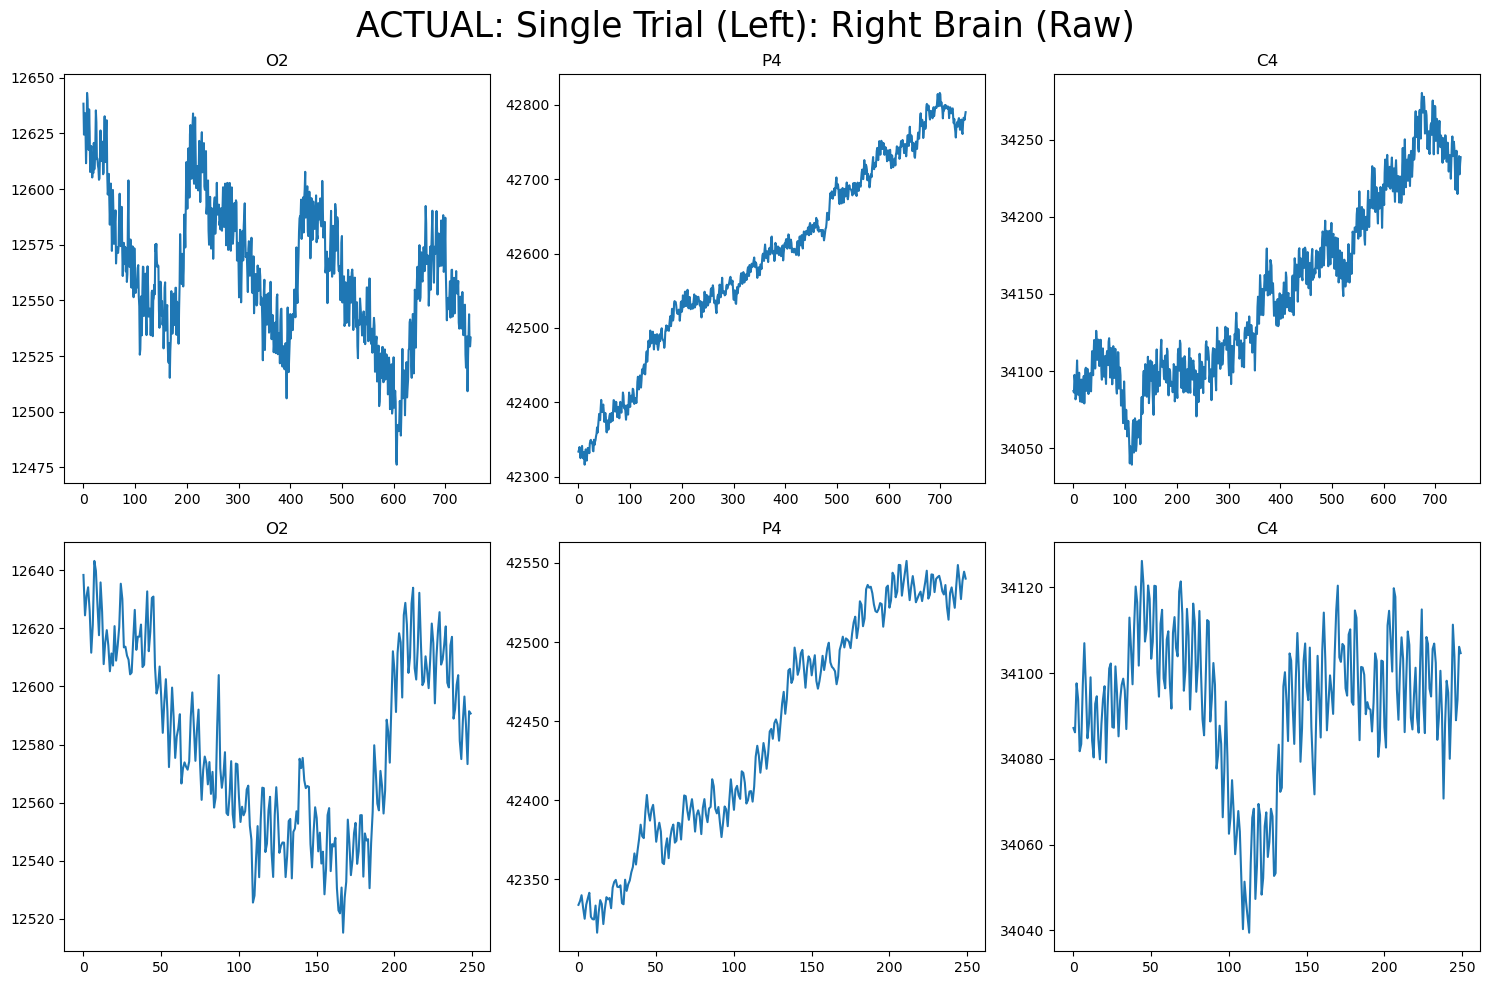

In [102]:
#single trial left, right brain
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d2_LS_i[trial]
trial_end = trial_start+750

rest_start = d2_LS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d2_channels[7][trial_start:trial_end])
axs[0,1].plot(d2_channels[5][trial_start:trial_end])
axs[0,2].plot(d2_channels[2][trial_start:trial_end])

#row2
axs[1,0].plot(d2_channels[7][rest_start:rest_end])
axs[1,1].plot(d2_channels[5][rest_start:rest_end])
axs[1,2].plot(d2_channels[2][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')

fig.suptitle("ACTUAL: Single Trial (Left): Right Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Average Trials (Left): Right Brain (Raw)')

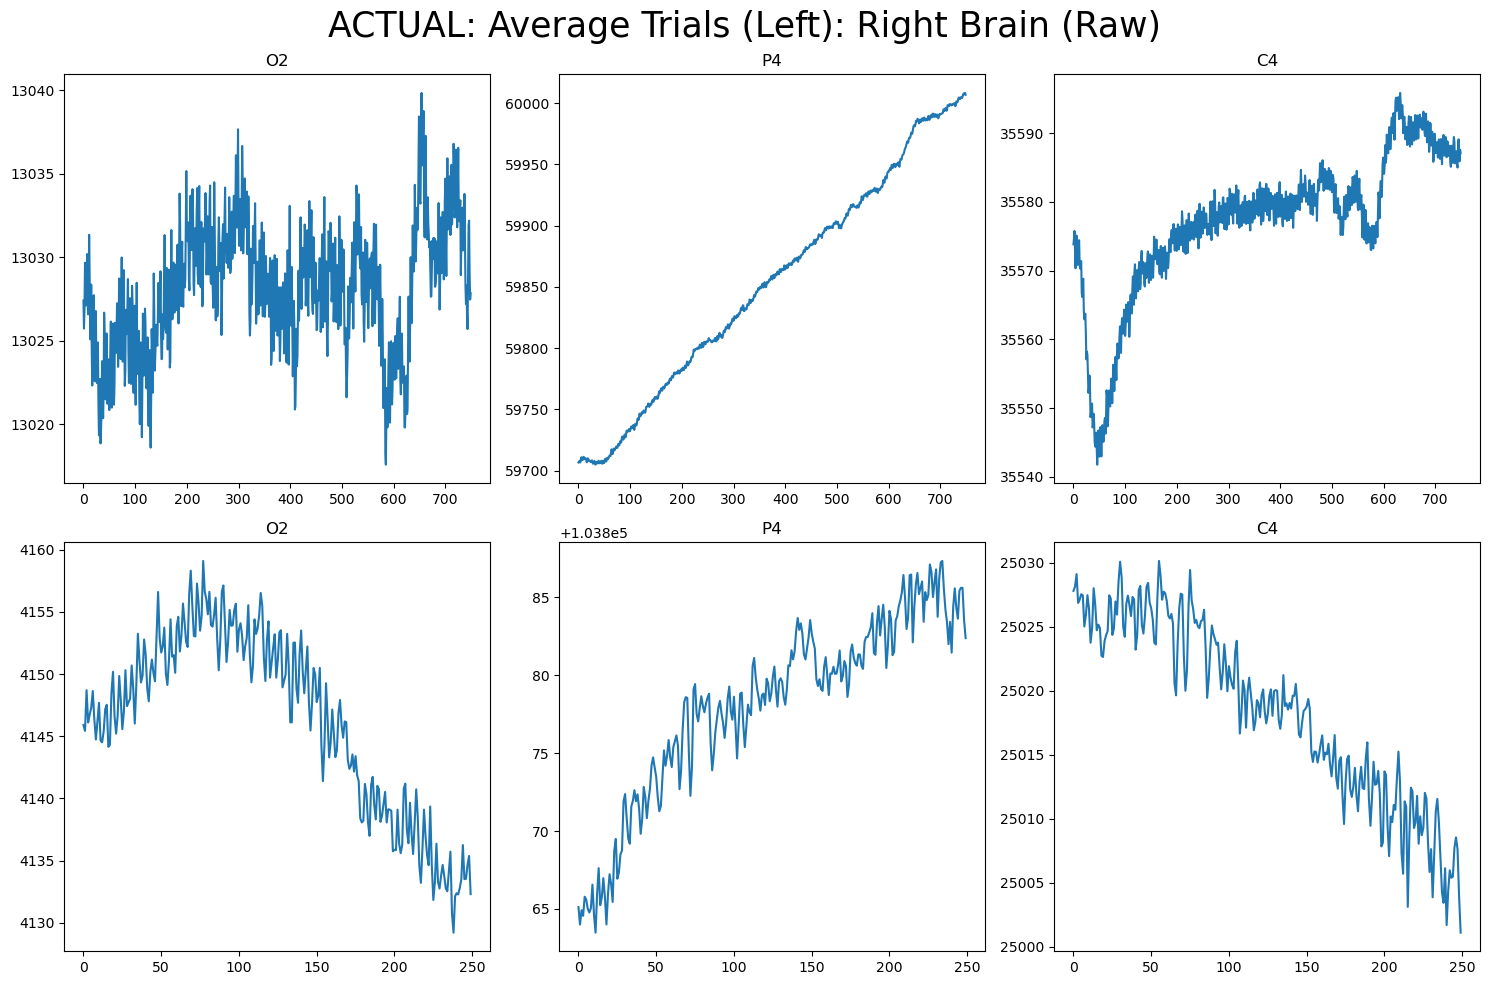

In [103]:
#avg trial left, right brain
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O2_avg_trial = []
P4_avg_trial = []
C4_avg_trial = []
O2_avg_rest  = []
P4_avg_rest  = []
C4_avg_rest  = []

num_trials = len(d2_LS_i)

for i in range(750):
    O2_iter_sum = 0
    P4_iter_sum = 0
    C4_iter_sum = 0
    
    for trial in d2_LS_i:
        O2_iter_sum += d2_channels[7][trial+i][0]
        P4_iter_sum += d2_channels[5][trial+i][0]
        C4_iter_sum += d2_channels[2][trial+i][0]
        
    O2_avg_trial.append(O2_iter_sum/num_trials)
    P4_avg_trial.append(P4_iter_sum/num_trials)
    C4_avg_trial.append(C4_iter_sum/num_trials)
    
for i in range(250):
    O2_iter_sum_r = 0
    P4_iter_sum_r = 0
    C4_iter_sum_r = 0
    
    for trial in d2_LS_i:
        O2_iter_sum_r += d1_channels[7][trial+i+750][0]
        P4_iter_sum_r += d1_channels[5][trial+i+750][0]
        C4_iter_sum_r += d1_channels[2][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O2_avg_rest.append(O2_iter_sum_r/num_trials)
    P4_avg_rest.append(P4_iter_sum_r/num_trials)
    C4_avg_rest.append(C4_iter_sum_r/num_trials)
    
    
#row1
axs[0,0].plot(O2_avg_trial)
axs[0,1].plot(P4_avg_trial)
axs[0,2].plot(C4_avg_trial)

#row2
axs[1,0].plot(O2_avg_rest)
axs[1,1].plot(P4_avg_rest)
axs[1,2].plot(C4_avg_rest)

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')       
        
fig.suptitle("ACTUAL: Average Trials (Left): Right Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Single Trial (Right): Left Brain (Raw)')

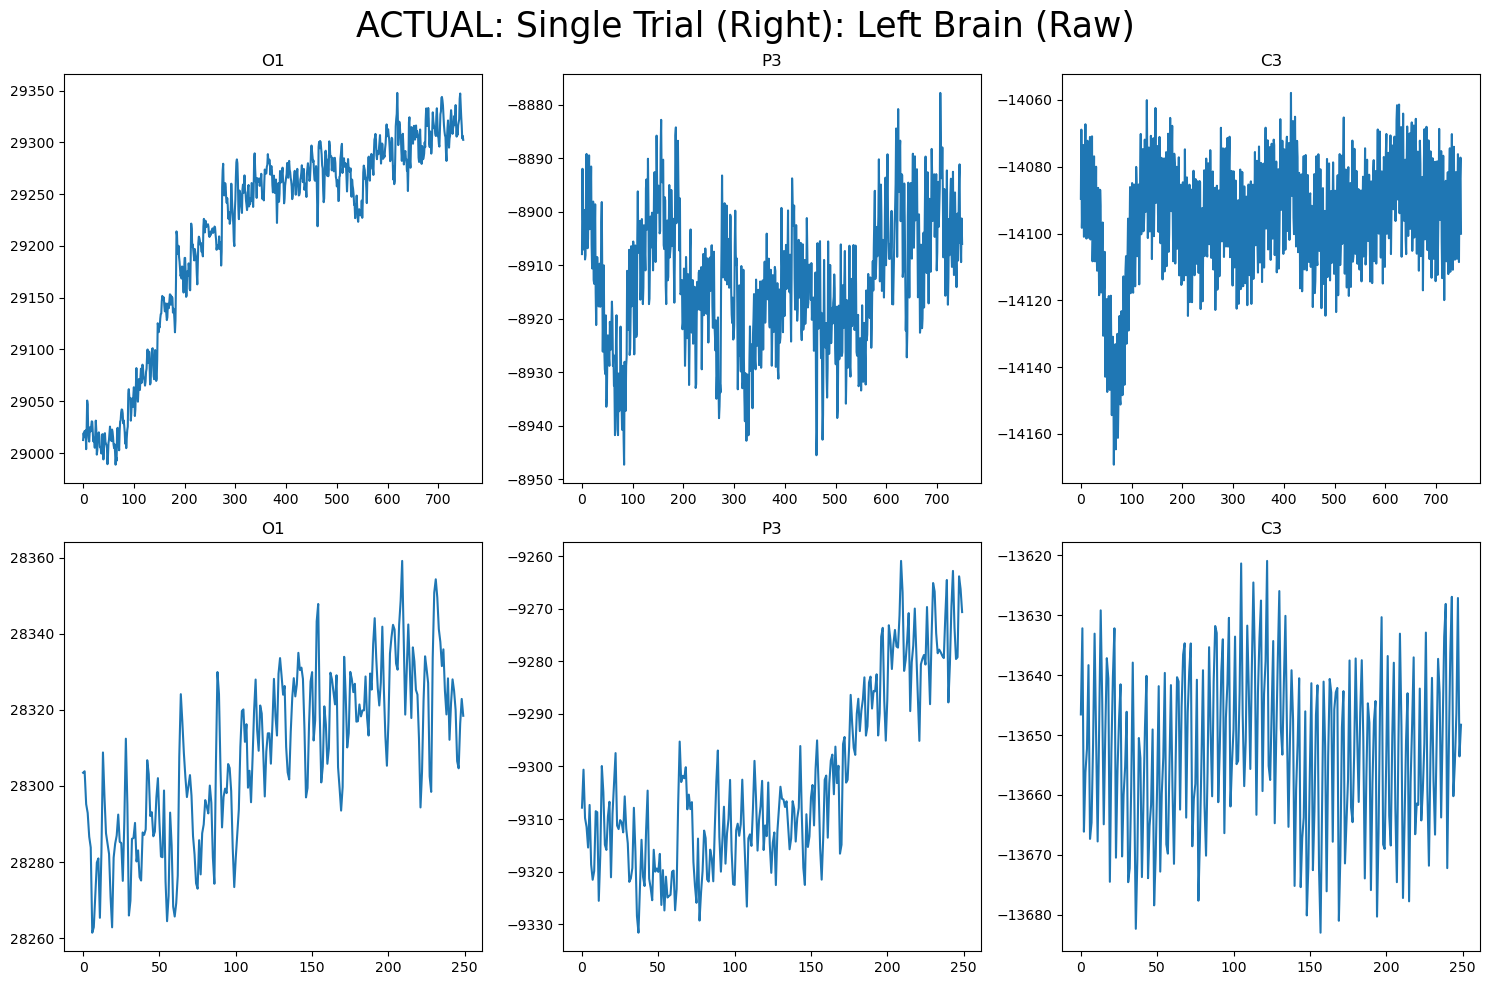

In [104]:
#single trial right, left brain

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d2_RS_i[trial]
trial_end = trial_start+750

rest_start = d1_RS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d2_channels[6][trial_start:trial_end])
axs[0,1].plot(d2_channels[3][trial_start:trial_end])
axs[0,2].plot(d2_channels[0][trial_start:trial_end])

#row2
axs[1,0].plot(d2_channels[6][rest_start:rest_end])
axs[1,1].plot(d2_channels[3][rest_start:rest_end])
axs[1,2].plot(d2_channels[0][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("ACTUAL: Single Trial (Right): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Average Trials (Right): Left Brain (Raw)')

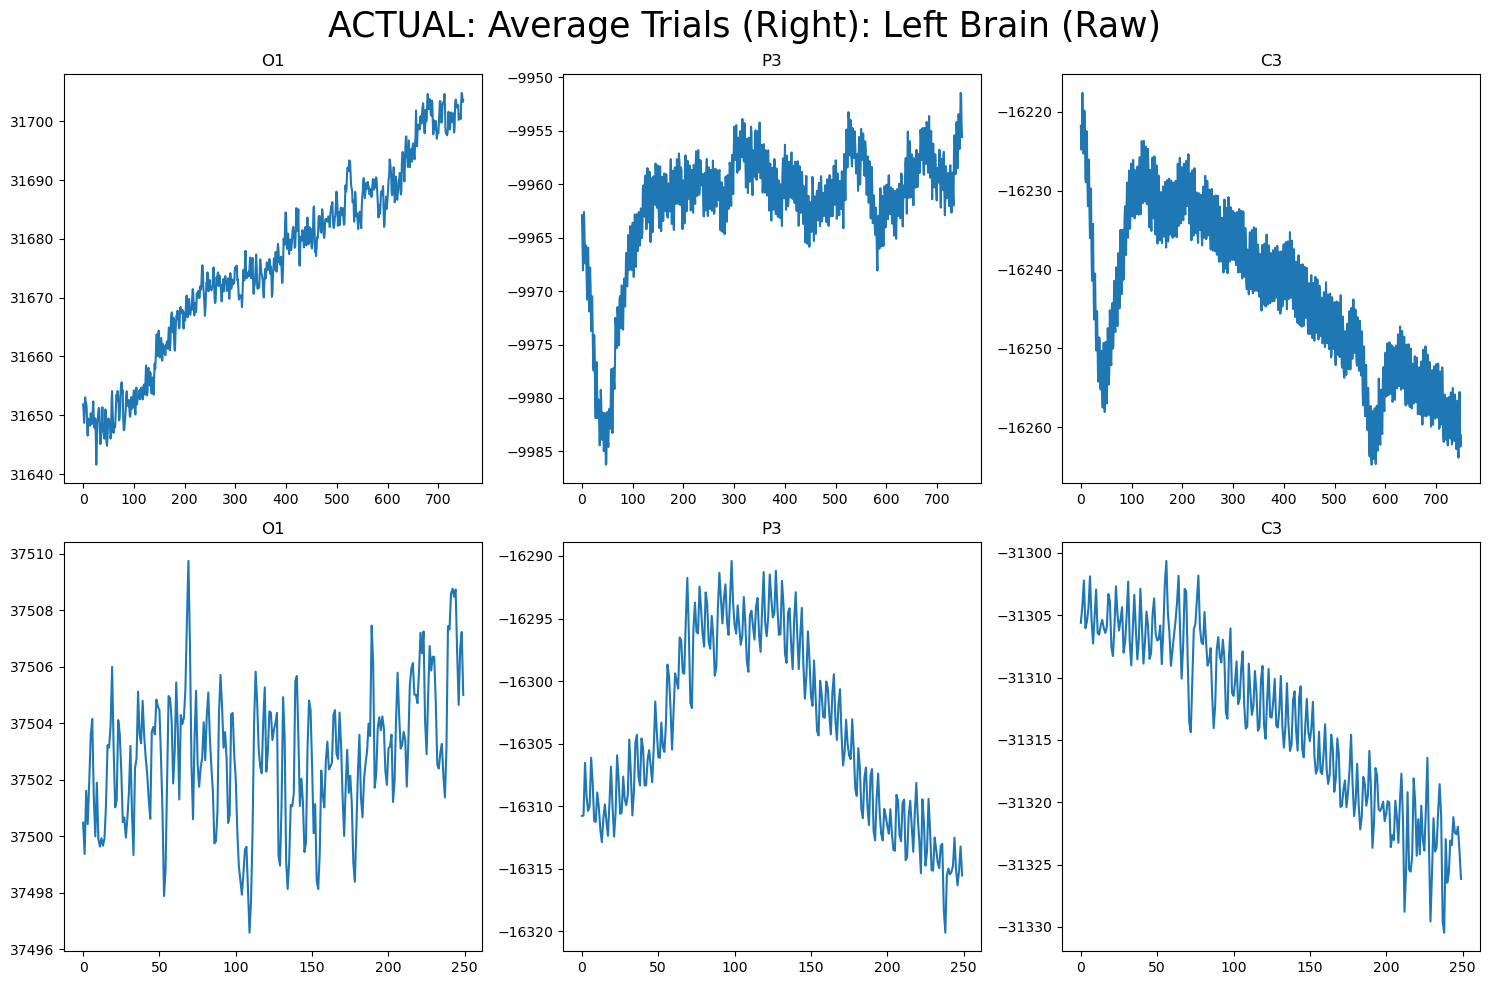

In [105]:
#avg trial right, left brain

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O1_avg_trial = []
P3_avg_trial = []
C3_avg_trial = []
O1_avg_rest  = []
P3_avg_rest  = []
C3_avg_rest  = []

num_trials = len(d2_RS_i)

for i in range(750):
    O1_iter_sum_t = 0
    P3_iter_sum_t = 0
    C3_iter_sum_t = 0
    
    for trial in d2_RS_i:
        O1_iter_sum_t += d2_channels[6][trial+i][0]
        P3_iter_sum_t += d2_channels[3][trial+i][0]
        C3_iter_sum_t += d2_channels[0][trial+i][0]
        
    O1_avg_trial.append(O1_iter_sum_t/num_trials)
    P3_avg_trial.append(P3_iter_sum_t/num_trials)
    C3_avg_trial.append(C3_iter_sum_t/num_trials)
    
for i in range(250):
    O1_iter_sum_r = 0
    P3_iter_sum_r = 0
    C3_iter_sum_r = 0
    
    for trial in d2_LS_i:
        O1_iter_sum_r += d1_channels[6][trial+i+750][0]
        P3_iter_sum_r += d1_channels[3][trial+i+750][0]
        C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O1_avg_rest.append(O1_iter_sum_r/num_trials)
    P3_avg_rest.append(P3_iter_sum_r/num_trials)
    C3_avg_rest.append(C3_iter_sum_r/num_trials)
    
#row1
axs[0,0].plot(O1_avg_trial)
axs[0,1].plot(P3_avg_trial)
axs[0,2].plot(C3_avg_trial)

#row2
axs[1,0].plot(O1_avg_rest)
axs[1,1].plot(P3_avg_rest)
axs[1,2].plot(C3_avg_rest)

#titles
axs[0,0].title.set_text('O1')
axs[0,1].title.set_text('P3')
axs[0,2].title.set_text('C3')
axs[1,0].title.set_text('O1')
axs[1,1].title.set_text('P3')
axs[1,2].title.set_text('C3')

fig.suptitle("ACTUAL: Average Trials (Right): Left Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Single Trial (Right): Right Brain (Raw)')

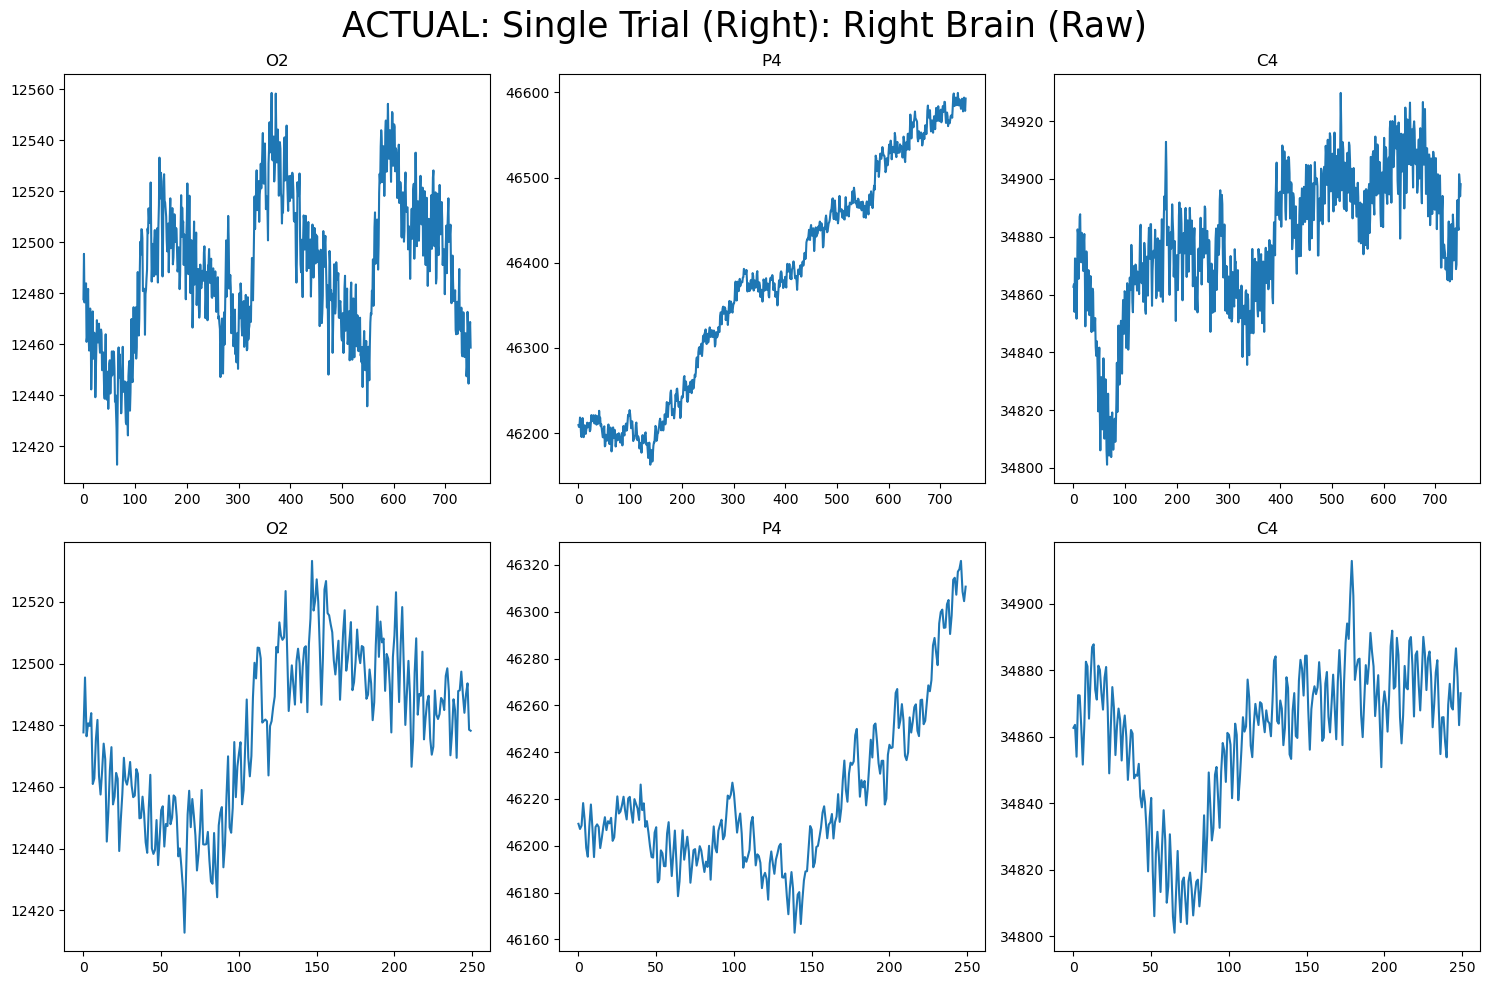

In [106]:
#single trial right, right brain

channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']
fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

trial = 10
trial_start = d2_RS_i[trial]
trial_end = trial_start+750

rest_start = d2_RS_i[trial]
rest_end = rest_start+250

#row1
axs[0,0].plot(d2_channels[7][trial_start:trial_end])
axs[0,1].plot(d2_channels[5][trial_start:trial_end])
axs[0,2].plot(d2_channels[2][trial_start:trial_end])

#row2
axs[1,0].plot(d2_channels[7][rest_start:rest_end])
axs[1,1].plot(d2_channels[5][rest_start:rest_end])
axs[1,2].plot(d2_channels[2][rest_start:rest_end])

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')

fig.suptitle("ACTUAL: Single Trial (Right): Right Brain (Raw)", fontsize=25)

Text(0.5, 0.98, 'ACTUAL: Average Trials (Right): Right Brain (Raw)')

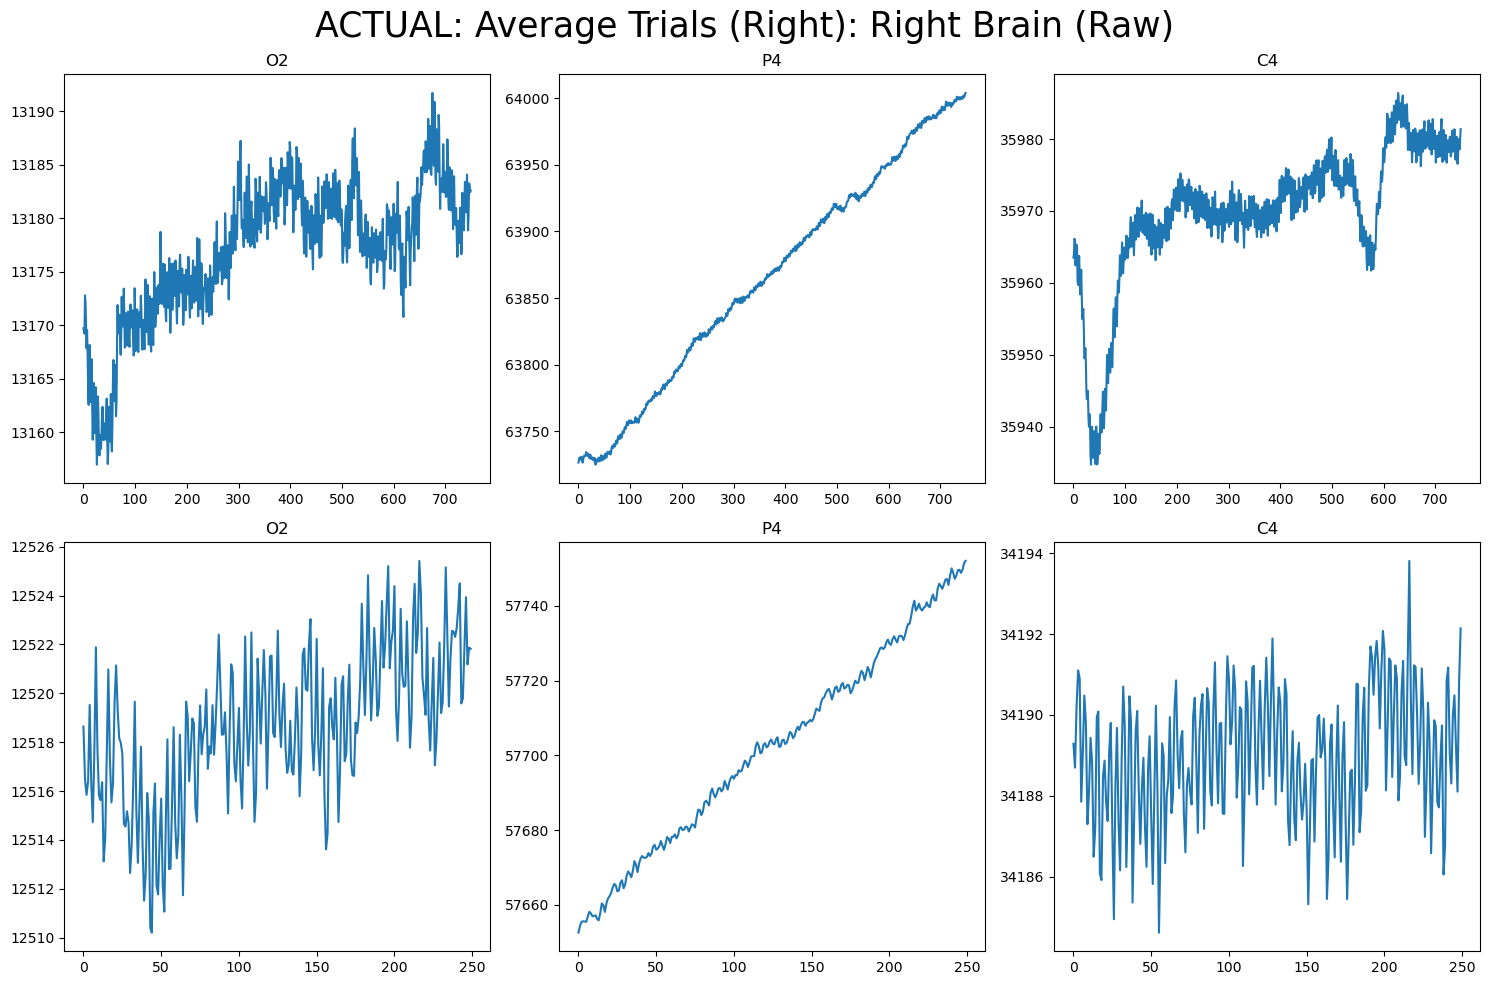

In [107]:
#avg trial right, right brain
channel_labels = ['C3', 'CZ', 'C4', 'P3', 'PZ', 'P4', 'O1', 'O2']

fig, axs = plt.subplots(2,3, figsize=(15,10), tight_layout=False)

O2_avg_trial = []
P4_avg_trial = []
C4_avg_trial = []
O2_avg_rest  = []
P4_avg_rest  = []
C4_avg_rest  = []

num_trials = len(d2_RS_i)

for i in range(750):
    O2_iter_sum = 0
    P4_iter_sum = 0
    C4_iter_sum = 0
    
    for trial in d2_RS_i:
        O2_iter_sum += d2_channels[7][trial+i][0]
        P4_iter_sum += d2_channels[5][trial+i][0]
        C4_iter_sum += d2_channels[2][trial+i][0]
        
    O2_avg_trial.append(O2_iter_sum/num_trials)
    P4_avg_trial.append(P4_iter_sum/num_trials)
    C4_avg_trial.append(C4_iter_sum/num_trials)
    
for i in range(250):
    O2_iter_sum_r = 0
    P4_iter_sum_r = 0
    C4_iter_sum_r = 0
    
    for trial in d2_LS_i:
        O2_iter_sum_r += d2_channels[7][trial+i+750][0]
        P4_iter_sum_r += d2_channels[5][trial+i+750][0]
        C4_iter_sum_r += d2_channels[2][trial+i+750][0]
        
    #for trial in d1_RS_i:
    #    O1_iter_sum_r += d1_channels[6][trial+i+750][0]
    #    P3_iter_sum_r += d1_channels[3][trial+i+750][0]
    #    C3_iter_sum_r += d1_channels[0][trial+i+750][0]
        
    #O1_iter_sum_r = O1_iter_sum_r/2
    #P3_iter_sum_r = P3_iter_sum_r/2
    #C3_iter_sum_r = C3_iter_sum_r/2
    
    O2_avg_rest.append(O2_iter_sum_r/num_trials)
    P4_avg_rest.append(P4_iter_sum_r/num_trials)
    C4_avg_rest.append(C4_iter_sum_r/num_trials)
    
    
#row1
axs[0,0].plot(O2_avg_trial)
axs[0,1].plot(P4_avg_trial)
axs[0,2].plot(C4_avg_trial)

#row2
axs[1,0].plot(O2_avg_rest)
axs[1,1].plot(P4_avg_rest)
axs[1,2].plot(C4_avg_rest)

#titles
axs[0,0].title.set_text('O2')
axs[0,1].title.set_text('P4')
axs[0,2].title.set_text('C4')
axs[1,0].title.set_text('O2')
axs[1,1].title.set_text('P4')
axs[1,2].title.set_text('C4')       
        
fig.suptitle("ACTUAL: Average Trials (Right): Right Brain (Raw)", fontsize=25)